# Content

## 1. Sales
1.1 [EDA](https://colab.research.google.com/drive/1io5VNWHmiDmn_rg9bKa1j0H6LqDNS4NR)  
1.2 [SPC](https://colab.research.google.com/drive/1PbqfbITrbjdQzJAGWF3PSCasTG7g7Wzy#scrollTo=3ON5yj9YfXxk)  
1.3 [FC](https://colab.research.google.com/drive/1hu78fzV_VS4bXGMnkidhgh9fPP1kFGWl#scrollTo=PeJZJm4YYtJ5)  
1.4 [Data Mining and RFM](https://colab.research.google.com/drive/1h28pnMQc8uKE8WTVBPwbWj7R1Tv3dx34)  
1.5 [Dashboard](https://colab.research.google.com/drive/1p8vbCfD991t8-4srvKDEm7souyviOzcQ#scrollTo=RCYNS8i8h4sa)  
1.6 [Market Basket](https://colab.research.google.com/drive/1iTeN6MO9LOQSy5rBdypyqJXe3nZX8DxR)  
1.7 [Collaborative Filtering](https://colab.research.google.com/drive/1JoeBe9Lz-47EhuuJ8FRRArUSxjOH0-Xd)  
1.8 [Hybrid Recommender](https://colab.research.google.com/drive/1urcbHXMQKsSpFjGUk8pj5AHgC076zM4d)  
1.9 Churn Prediction

# Statistische Prozessregelung (SPC)

Nachdem wir im ersten Kapitel durch die Explorative Datenanalyse (EDA) ein gutes Verständnis für unseren Datensatz entwickelt haben, gehen wir nun einen Schritt weiter: Wir analysieren systematisch, wie sich der Prozess im Zeitverlauf verhält. Unser Ziel liegt vor allem darin herauszufinden, bei welchen Datenpunkten es sich um Ausreißer handeln könnte. Denn jede Vorhersage kann nur so gut sein, wie die ihr zur Verfügung gestellte Datengrundlage.

Zum Schluss dieses Kapitels setzen wir die Statistische Prozesskontrolle (Statistical Process Control, SPC) ein. Hierbei handelt es sich um eine bewährte Methodik, um Prozesse auf Basis statistischer Verfahren zu analysieren, zu überwachen und gegebenenfalls zu korrigieren.



In diesem Kapitel werden wir:

- auffällige Datenpunkte identifizieren, die auf mögliche Störungen, Ausreißer oder Sonderursachen hindeuten,

- Toleranzgrenzen erarbeiten, um klar zu definieren, welche Werte als akzeptabel gelten und welche nicht,

- Kontrollkarten erstellen, mit denen sich der Prozess in Echtzeit überwachen lässt.



Ob in der Fertigung, im Service oder in datengetriebenen Projekten – die Prinzipien der SPC sind universell einsetzbar und bilden die Brücke zwischen Datenanalyse (EDA) und aktiver Prozesslenkung.
In den folgenden Abschnitten werden wir Schritt für Schritt lernen, wie man SPC in Python umsetzt, die richtigen Kennzahlen wählt, die Kontrollkarten interpretiert und daraus handlungsrelevante Erkenntnisse ableitet.

Kapitel 1:
Begrifflichkeiten, die in diesem Kapitel neu sind:
- Dataframe
- Deskriptive Statistik
- Visualisierungen: Histogramme (Verteilungen)

Bibliotheken, die in diesem Kapitel neu sind:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Plotly
- Pandas Profiling

Kapitel 2: Begrifflichkeiten, die in diesem Kapitel neu sind:
- Statistische Prozessregelung
- Ausreisser / Anomalien / Rauschen

Bibliotheken, die in diesem Kapitel neu sind:
- Plotly Express
- Statsmodels
- Fbprophet


# Checking for unusual values within the time series

In [ ]:
!pip install plotly_express
#import plotly_express as px

In [ ]:
import plotly_express as px
import pandas as pd
data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
# Let us group the daily sum for all customers and SalesItems.
DailySalesSum=data.resample('D', on='SalesDate').sum() #group on a daily 'D' basis;
# Notice that SalesDate is not a column any longer, but now an index, due to grouping on SalesDate level
DailySalesSum.head()
# Please note that the sum of Customers, SalesTransactionID, and SalesItem does not make any sense here, because it only sums all our Customer codes. But we are just interested in SalesValue or SalesAmount per SalesDay, see next cell.

SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
SalesDate                                                                   
2016-05-02   676484.17         3623     14241             8472690     361020
2016-05-03   411892.57         1910      7243             5582178     170648
2016-05-04  3112075.11         4758     11305             6641265     295923
2016-05-05   349020.52         1004      8294             4513983     266972
2016-05-06  1723892.93         2965     11290             8665817     354422

# Aufgabe: Was ist mit der Spalte SalesDate passiert?

In [ ]:
fig = px.line(DailySalesSum,  y="SalesAmount")
# above we missed to call the x axis, that is why the index has been used. Time series is per definition ordered.
fig.show(renderer="colab")

# Aufgabe: Was fällt Ihnen an dieser Visualisierung auf?

In [ ]:
# Tragen Sie hier Ihre Gedanken ein...



























In [ ]:
# Filtern Sie den DataFrame, um Tage mit einem Gesamtumsatz von 0 zu finden.
days_with_zero_sales = data[data['SalesAmount'] == 0]

# Überprüfen Sie, ob es Tage mit null Verkäufen gibt, und geben Sie die Ergebnisse aus.
if days_with_zero_sales.empty:
    print("Es gab keine Tage mit einem Gesamtumsatz von 0.")
else:
    print("Tage mit einem Gesamtumsatz von 0:")
    print(days_with_zero_sales)

Es gab keine Tage mit einem Gesamtumsatz von 0.


In [ ]:
DailySalesSum.head()

SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
SalesDate                                                                   
2016-05-02   676484.17         3623     14241             8472690     361020
2016-05-03   411892.57         1910      7243             5582178     170648
2016-05-04  3112075.11         4758     11305             6641265     295923
2016-05-05   349020.52         1004      8294             4513983     266972
2016-05-06  1723892.93         2965     11290             8665817     354422

In [ ]:
# we need to reset the index after resampling
DailySalesSum = DailySalesSum.reset_index()
DailySalesSum.head()

SalesDate  SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
0 2016-05-02   676484.17         3623     14241             8472690     361020
1 2016-05-03   411892.57         1910      7243             5582178     170648
2 2016-05-04  3112075.11         4758     11305             6641265     295923
3 2016-05-05   349020.52         1004      8294             4513983     266972
4 2016-05-06  1723892.93         2965     11290             8665817     354422

# Aufgabe: Bilden Sie die monatliche Summe ab

In [ ]:
# Geben Sie hier Ihren Code ein...



























In [ ]:
MonthlySalesSum=data.resample('M', on='SalesDate').sum() # M stands for Month End, in contrast to MS-Month Start
MonthlySalesSum = MonthlySalesSum.reset_index()
MonthlySalesSum.head()

/tmp/ipython-input-3249987930.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



SalesDate   SalesValue  SalesAmount  Customer  SalesTransactionID  \
0 2016-05-31  20166177.78        51265    219003           147309836   
1 2016-06-30  20092795.13        56692    236608           164558983   
2 2016-07-31  19127473.54        53954    234838           181719685   
3 2016-08-31  19677492.02        55496    246380           181872656   
4 2016-09-30  19663361.67        53552    230070           169774628   

   SalesItem  
0    5878767  
1    6267283  
2    6182682  
3    6316045  
4    6271814

# Aufgabe: Visualisieren Sie die monatlichen Umsätze per Zeitschiene
Beachten Sie, dass wir vorhin die Datumsspalte indiziert hatten:  
fig = px.line(DailySalesSum,  y="SalesAmount")

In [ ]:
# Geben Sie hier Ihren Code ein...
























In [ ]:
fig = px.line(MonthlySalesSum,  x='SalesDate',y="SalesAmount")
fig.show(renderer="colab")

In [ ]:
YearSalesSum=data.resample('Y', on='SalesDate').sum()
YearSalesSum

/tmp/ipython-input-1083437751.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
SalesDate                                                                     
2016-12-31  1.606656e+08       444177   1941523          1383465528   51351050
2017-12-31  2.633926e+08       740203   2472366          1392947603   67254107
2018-12-31  2.754881e+08       763393   2078058           886671545   60199985
2019-12-31  2.892353e+08       779862   1970097           651042017   59829983
2020-12-31  2.516677e+07        74828    176316            54579573    5694588

In [ ]:
YearSalesSum = YearSalesSum.reset_index()
YearSalesSum.head()

SalesDate    SalesValue  SalesAmount  Customer  SalesTransactionID  \
0 2016-12-31  1.606656e+08       444177   1941523          1383465528   
1 2017-12-31  2.633926e+08       740203   2472366          1392947603   
2 2018-12-31  2.754881e+08       763393   2078058           886671545   
3 2019-12-31  2.892353e+08       779862   1970097           651042017   
4 2020-12-31  2.516677e+07        74828    176316            54579573   

   SalesItem  
0   51351050  
1   67254107  
2   60199985  
3   59829983  
4    5694588

In [ ]:
fig = px.line(YearSalesSum, x='SalesDate', y="SalesAmount")
fig.show(renderer="colab")

# Aufgabe: Ändern Sie die x- Achse, so dass die Jahresscheiben entsprechend sauber dargestellt werden.  
Anm.: also keine Darstellung von Juli- Werten


In [ ]:
# Geben Sie hier Ihren Code ein...
























In [ ]:
YearSalesSum=data.resample('Y', on='SalesDate').sum()
end_of_year_ticks = YearSalesSum[(YearSalesSum.index.month == 12) & (YearSalesSum.index.day == 31)].index

# Plot mit Markern und angepasster Achse
fig = px.line(YearSalesSum, x=YearSalesSum.index, y="SalesAmount", markers=True)

fig.update_xaxes(
    tickvals=end_of_year_ticks, # Setzt die Labels nur auf die Datumsangaben in dieser Liste
    tickformat="%d.%m.%Y"       # Formatiert die Labels als Tag.Monat.Jahr
)

fig.show(renderer="colab")



/tmp/ipython-input-3968895784.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



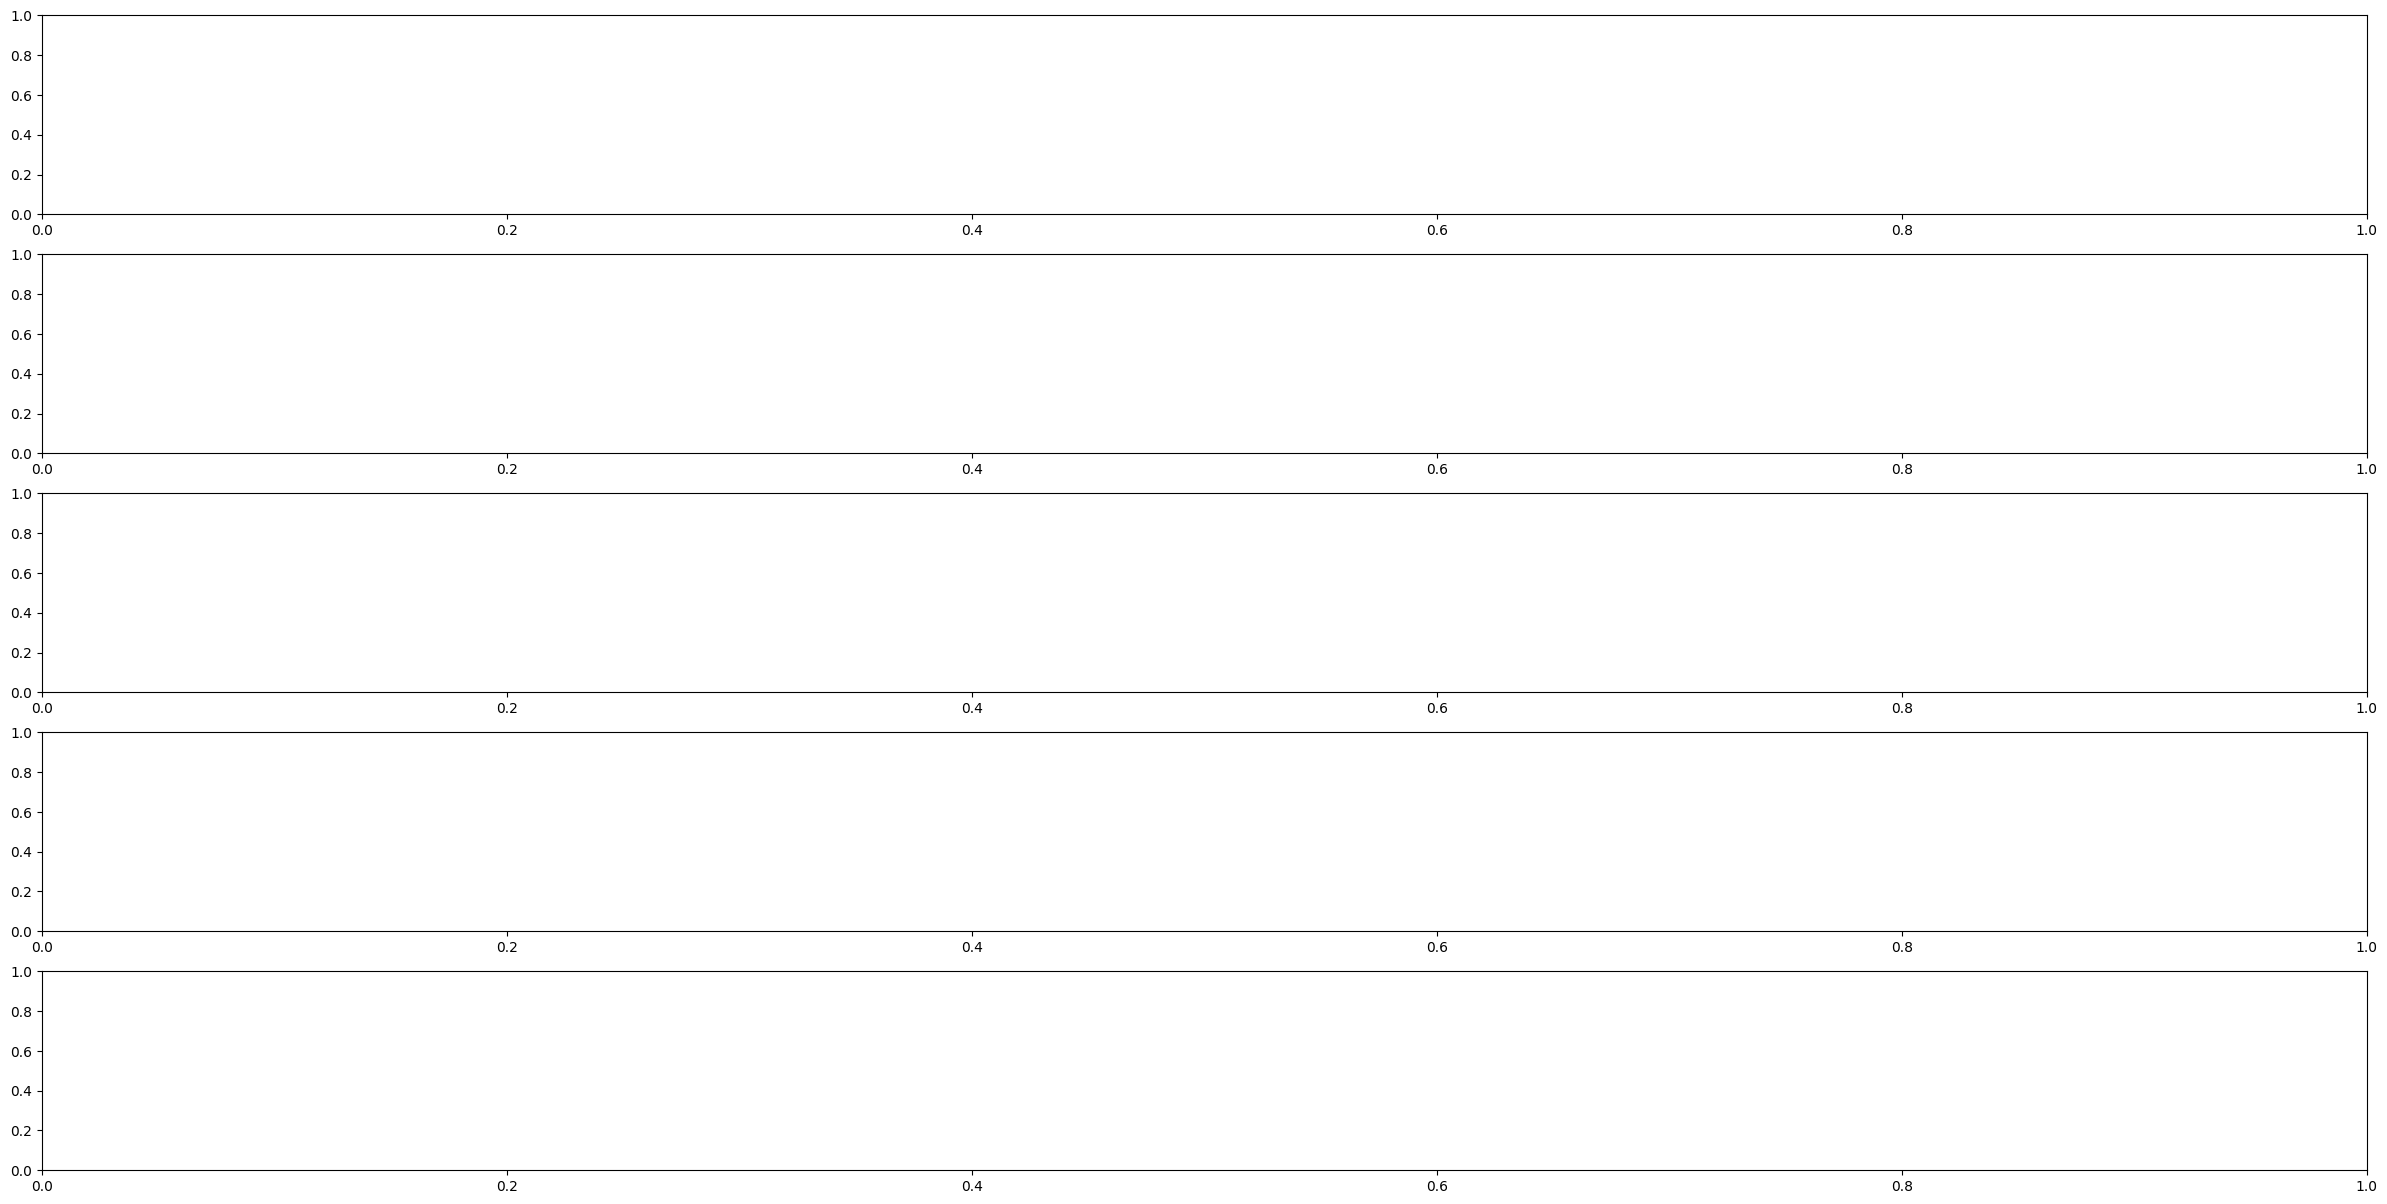

In [ ]:
# Instead of the above cells, we can also do it all in one cell via creating one DF for grouping on time series
TimeSeriesGroup = data.set_index('SalesDate')
TimeSeriesGroup=TimeSeriesGroup.drop(columns=[ 'SalesValue','Customer','SalesTransactionID','SalesItem'])

# This time we will calculate the mean (insted of sums) and then plot five diagrams.
# I would always stick to summing our sales amount instead of averaging. Using average will result in loss of information. But for learning purpose we will give mean a try here. And we can also see that average smoothens our data, which can be a very supportive thing.
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(30,15))



Ein Diagramm (`fig`) und fünf Unterdiagramme (`ax1` bis `ax5`) werden erstellt:

* **`plt.subplots(5, figsize=(30,15))`**: Diese Funktion von **matplotlib** erstellt ein großes Hauptdiagramm (`fig`) und eine Reihe von Unterdiagrammen. Die `5` sagt, dass es fünf Unterdiagramme übereinander geben soll. `figsize=(30,15)` legt die Größe des gesamten Hauptdiagramms auf 30 Zoll Breite und 15 Zoll Höhe fest.

* **`fig, (ax1,ax2,ax3,ax4,ax5) = ...`**: Dies ist eine Zuweisung per Tupel-Entpackung.
    * **`fig`** ist das Hauptdiagramm-Objekt, das als Behälter für alle Unterdiagramme dient.
    * **`(ax1,ax2,ax3,ax4,ax5)`** ist ein Tupel, das die fünf einzelnen Unterdiagramm-Objekte enthält. Jede Variable (`ax1`, `ax2`, usw.) repräsentiert einen eigenen Plotbereich, auf dem die Daten gezeichnet werden können.


In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(30,15))
# note that all days in between our time series get plotted, even if no sales exist. That's the reason for the many 0 values.
ax1.plot(TimeSeriesGroup['SalesAmount'].resample('D').mean())
ax1.set_title('Daily');

ax2.plot(TimeSeriesGroup['SalesAmount'].resample('W').mean())
ax2.set_title('Weekly');

ax3.plot(TimeSeriesGroup['SalesAmount'].resample('M').mean())
ax3.set_title('Monthly');

ax4.plot(TimeSeriesGroup['SalesAmount'].resample('Q').mean())
ax4.set_title('Quarterly');

ax5.plot(TimeSeriesGroup['SalesAmount'].resample('A').mean())
ax5.set_title('Yearly');

/tmp/ipython-input-2942682265.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-2942682265.py:11: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/tmp/ipython-input-2942682265.py:14: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



# Aufgabe: Was lässt sich diesen Auswertungen entnehmen?


Erinnern Sie sich noch daran, als wir in Kapitel 1 über Box Plots gesprochen haben? Wenn wir uns den wöchentlichen Mittelwert und die Standardabweichung ansehen können wir erkennen, wie sich die Lage und die Varianzen im Laufe der Zeit verändern.  


Der Mittelwert, Median und die Standardabweichung sind statistische Messgrößen, die helfen, Datensätze zu verstehen und zu beschreiben.

## Mittelwert (Durchschnitt)

Der **Mittelwert** ist der Durchschnitt eines Datensatzes. Du berechnest ihn, indem du alle Zahlen zusammenzählst und das Ergebnis durch die Anzahl der Zahlen teilst. Er gibt dir eine Vorstellung davon, wo sich die "Mitte" der Daten befindet.

$$\text{Mittelwert} = \frac{\text{Summe aller Werte}}{\text{Anzahl der Werte}}$$

## Median

Der **Median** ist der mittlere Wert in einem Datensatz, nachdem dieser der Größe nach geordnet wurde. Wenn es eine ungerade Anzahl von Werten gibt, ist der Median die genau in der Mitte liegende Zahl. Bei einer geraden Anzahl von Werten ist der Median der Durchschnitt der beiden mittleren Zahlen. Der Median ist nützlich, weil er weniger durch Ausreißer (extrem hohe oder niedrige Werte) beeinflusst wird als der Mittelwert.

## Standardabweichung

Die **Standardabweichung** misst, wie weit die einzelnen Werte eines Datensatzes im Durchschnitt vom Mittelwert entfernt sind. Eine kleine Standardabweichung bedeutet, dass die Werte eng um den Mittelwert gruppiert sind. Eine große Standardabweichung zeigt an, dass die Werte weit verstreut sind. Sie gibt dir ein Gefühl für die Streuung oder Variabilität der Daten.

***

Beispiel

Stell dir vor, du hast die täglichen Verkaufserlöse in Euro für 5 Tage: 10, 20, 30, 40, 100.

* **Mittelwert:**
    (10 + 20 + 30 + 40 + 100) / 5 = 200 / 5 = **40** €
    Der durchschnittliche Tagesumsatz beträgt 40 €.

* **Median:**
    Zuerst ordnest du die Zahlen: 10, 20, **30**, 40, 100.
    Die mittlere Zahl ist die **30**. Der Median ist 30 €.
    Der Mittelwert (40 €) ist durch den Ausreißer 100 € stark nach oben gezogen, während der Median (30 €) die wahre "Mitte" besser widerspiegelt.

* **Standardabweichung:**
    Um die Standardabweichung zu berechnen, müsstest du jeden Wert vom Mittelwert (40) subtrahieren, die Differenzen quadrieren, deren Durchschnitt berechnen und dann die Wurzel ziehen.
    
    * (10 - 40)² = 900
    * (20 - 40)² = 400
    * (30 - 40)² = 100
    * (40 - 40)² = 0
    * (100 - 40)² = 3600
    
    Durchschnitt der quadrierten Differenzen (Varianz): (900 + 400 + 100 + 0 + 3600) / 5 = 5000 / 5 = 1000
    
    Standardabweichung: $$\sqrt{1000} \approx 31.62$$
    Eine Standardabweichung von ca. 31,62 € ist im Vergleich zum Mittelwert von 40 € relativ hoch. Das zeigt, dass die Umsatzzahlen stark voneinander abweichen.

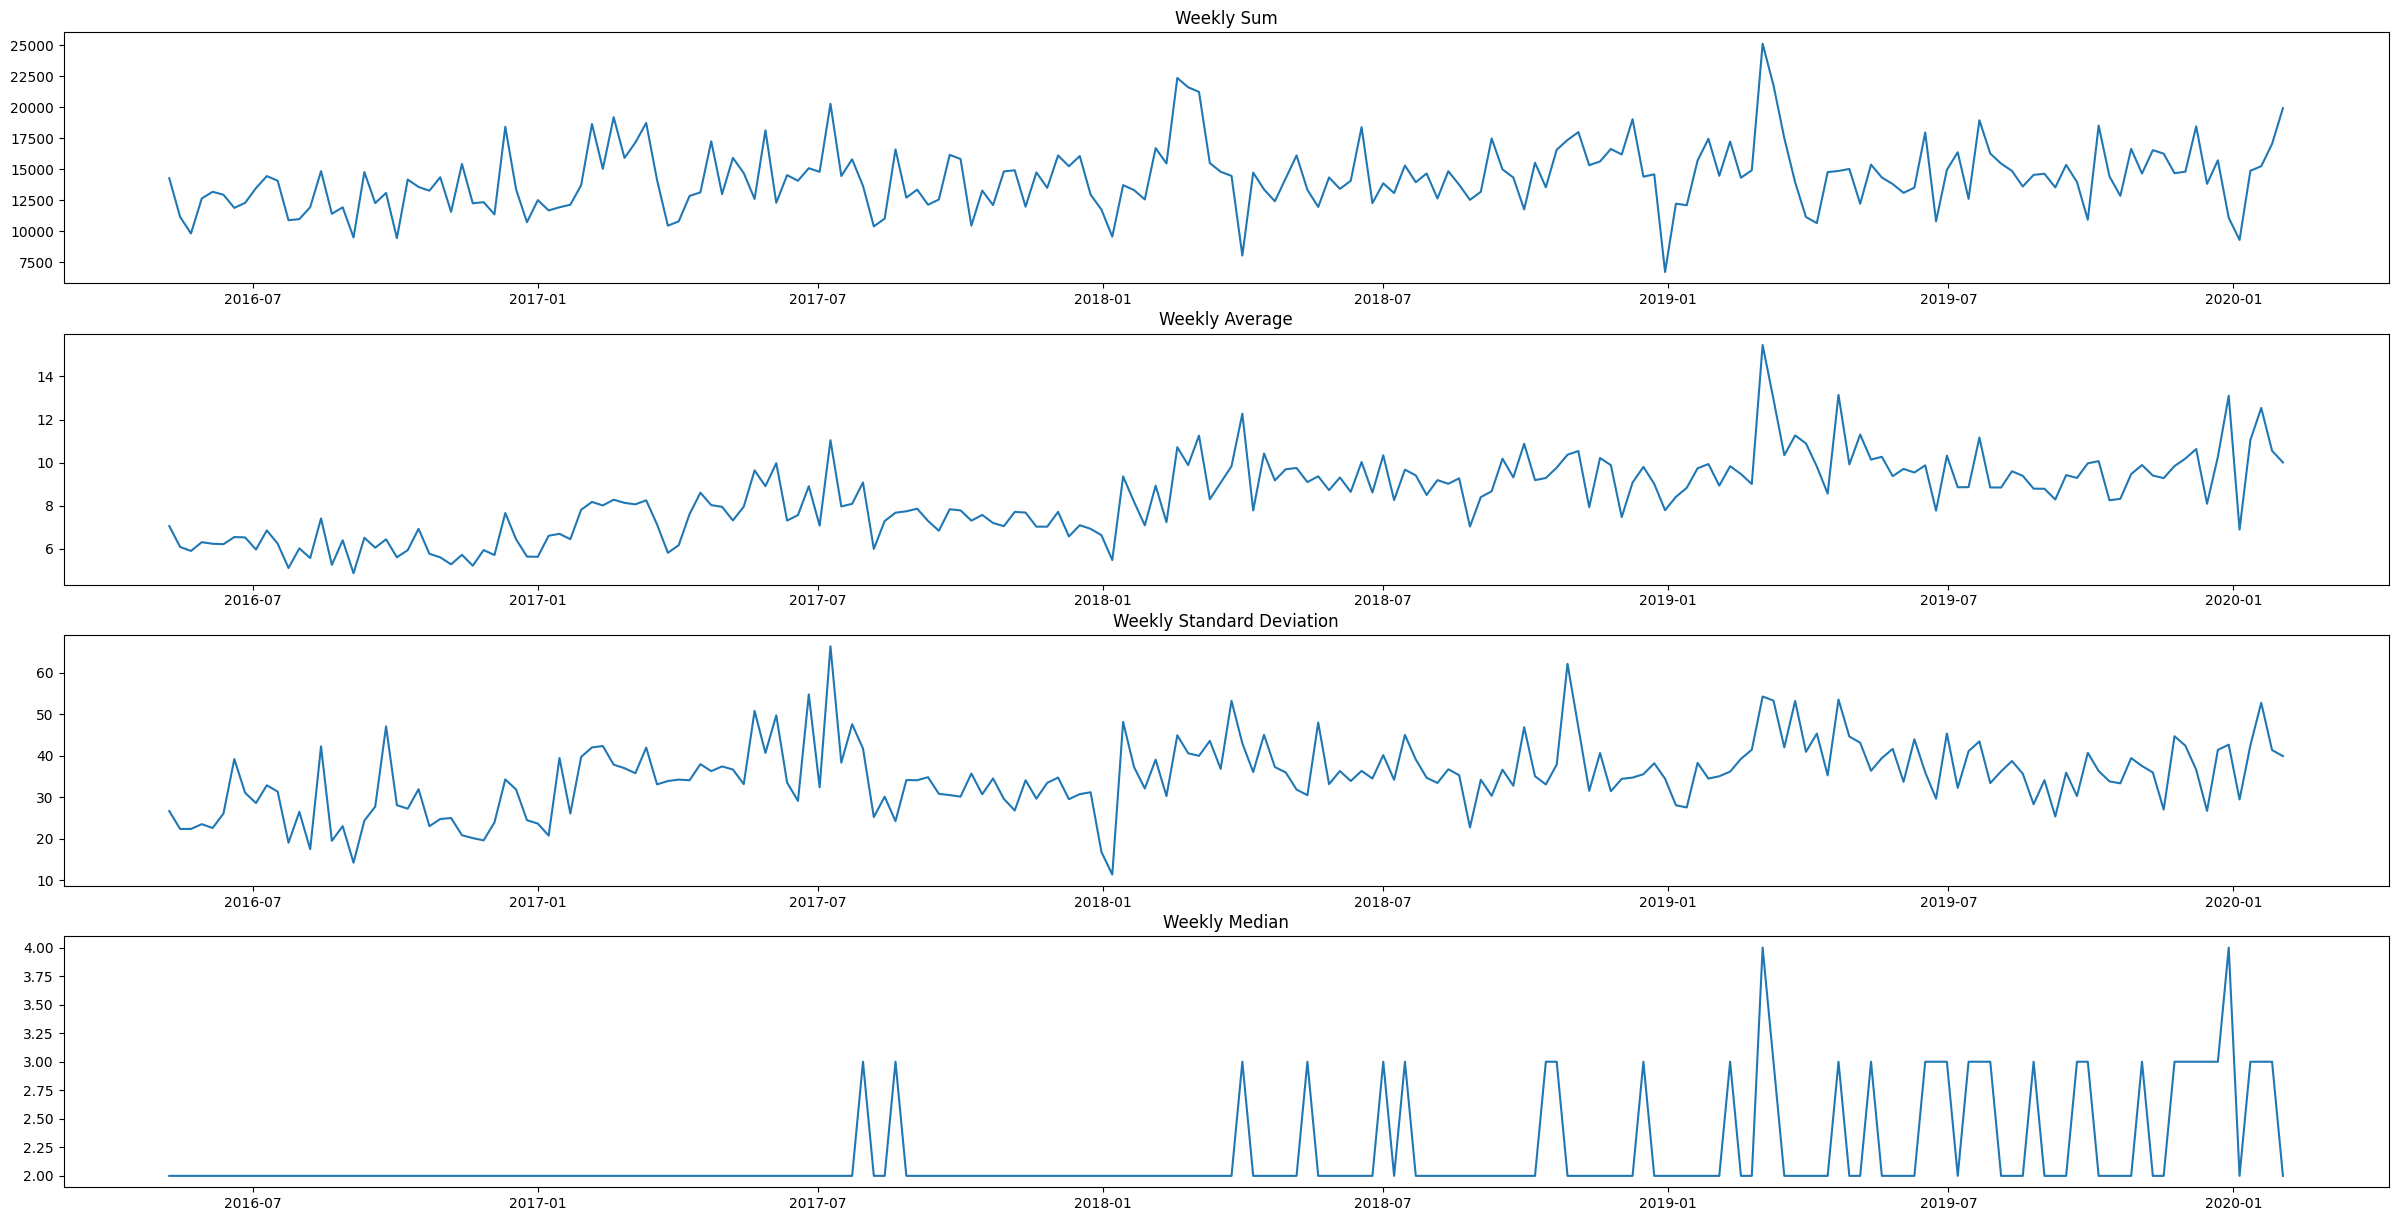

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(30,15))

ax1.plot(TimeSeriesGroup['SalesAmount'].resample('W').sum())
ax1.set_title('Weekly Sum');

ax2.plot(TimeSeriesGroup['SalesAmount'].resample('W').mean())
ax2.set_title('Weekly Average');

ax3.plot(TimeSeriesGroup['SalesAmount'].resample('W').std())
ax3.set_title('Weekly Standard Deviation');

ax4.plot(TimeSeriesGroup['SalesAmount'].resample('W').median())
ax4.set_title('Weekly Median');

# Aufgabe: Warum scheint der wöchentliche Median scheintot zu sein?  
Anstatt eines Box Plots können wir z.B. auch auch das Violin Chart verwenden.

In [ ]:
# Geben Sie hier Ihren Code ein...


























In [ ]:

#quite resource intensive!
#Better than a histogram, you can spot the overall distribution regarding Min, Max, Mean/Median, Standard Deviatin using a Box Plot or Violin Graph
fig=px.violin(TimeSeriesGroup,  y="SalesAmount",box=True, points='all') # Replace Year by Month, or Weekday (Monday starts with 0), Quarter if you want to see overall monthly distribution
#simply pass "colab" as the value for the parameter renderer in fig.show(renderer="colab")
fig.show(renderer="colab")

# Anomaly Detection

Anomaly Detection (Anomalieerkennung) ist ein Bereich der Datenanalyse, der darauf abzielt, ungewöhnliche Muster oder Ausreißer in einem Datensatz zu identifizieren, die sich deutlich vom Großteil der Daten unterscheiden.

### Was ist eine Anomalie?
Eine Anomalie, auch als Ausreißer oder Ausnahmedatenpunkt bezeichnet, ist ein Datenpunkt, der nicht dem erwarteten Verhalten entspricht.  Beispiele hierfür sind:

* Ein plötzlicher Anstieg der Kreditkartenausgaben in einer untypischen Region (Finanzbetrug).
* Ein ungewöhnlich hoher Stromverbrauch in einer Fabrik zu unproduktiven Zeiten (Gerätedefekt).
* Eine Abweichung vom normalen Blutdruck eines Patienten (medizinische Diagnose).

---

### Warum ist Anomaly Detection wichtig?
Die Erkennung von Anomalien ist entscheidend, da sie auf kritische Ereignisse hinweisen kann, die menschliche Fehler, Betrug, Systemfehler oder seltene, aber wichtige Phänomene darstellen. Ohne automatisierte Erkennung könnten diese Anomalien unbemerkt bleiben und erhebliche Schäden verursachen.

---


### Methoden der Anomaly Detection
Es gibt verschiedene Ansätze zur Erkennung von Anomalien, die sich in drei Hauptkategorien einteilen lassen:

1.  **Statistische Methoden**: Basieren auf statistischen Verteilungen, um Datenpunkte zu identifizieren, die außerhalb eines bestimmten Wahrscheinlichkeitsbereichs liegen (siehe Kapitel 3, FC).
2.  **Maschinelles Lernen**: Algorithmen werden trainiert, um das "normale" Verhalten der Daten zu lernen und dann Abweichungen davon zu erkennen (siehe auch Kapitel Churn Prediction).
3.  **Wissensbasierte Methoden**: Verwenden vordefinierte Regeln oder Schwellenwerte, um Anomalien zu identifizieren (siehe SPC, weiter unten in diesem Kapitel).

Aufgabe: Erweiteren Sie den Datensatz um separate Spalten für Jahr, Monat, Wochentag, Quartal und Kalenderwoche.  
Anaylisieren Sie anschließend die Gesamtverkäufe nach z.B. Wochentag.

In [ ]:
# Geben Sie hier Ihren Code ein..





















In [ ]:
#Extracting Year and Month out of our Day-Date, for spotting any monthly or yearly patterns
data['Year']= data['SalesDate'].dt.year
# the above code means that we are extracting the year out of our column SalesDate and add that year into a new column Year into the same dataframe data.
data['Month']= data['SalesDate'].dt.month
data['Weekday']= data['SalesDate'].dt.weekday
data['Quarter']= data['SalesDate'].dt.quarter
data['Week']= data['SalesDate'].dt.isocalendar().week
data.head()



SalesDate  SalesValue  SalesAmount  Customer  SalesTransactionID  \
0 2018-09-28      8280.0           10         0                   0   
1 2018-09-28      7452.0           10         0                   0   
2 2019-04-23     21114.0           30         0                   1   
3 2019-04-23      7038.0           10         0                   1   
4 2019-04-23      7000.0            2         0                   1   

   SalesItem  Year  Month  Weekday  Quarter  Week  
0          0  2018      9        4        3    39  
1          0  2018      9        4        3    39  
2          0  2019      4        1        2    17  
3          1  2019      4        1        2    17  
4          2  2019      4        1        2    17

In [ ]:
data.groupby(['Weekday'])['SalesAmount'].sum()

# Aufgabe: Aggredieren Sie die SalesAmount auf Monatsbasis, um den Datensatz für eine Zeitreihenanalyse von Verkaufsanomalien vorzubereiten.

In [ ]:
# Geben Sie hier Ihren Code ein...















In [ ]:
#Anomaly Detection: spotting unusual datapoints
AnomalyTimeSeries = data.set_index('SalesDate')
AnomalyTimeSeries=AnomalyTimeSeries.drop(columns=[ 'SalesValue','Customer','SalesTransactionID','SalesItem'])
AnomalyTimeSeries = AnomalyTimeSeries.resample('MS').sum() # grouping SalesAmount on a monthly basis, for each Month Start 'MS'
# in case you want to resample (group) not on a yearly or weekly level instead
#AnomalyTimeSeries = AnomalyTimeSeries.resample('W').sum() # weekly level
#AnomalyTimeSeries = AnomalyTimeSeries.resample('AS').sum() #yearly level
AnomalyTimeSeries.head()

SalesAmount
SalesDate              
2016-05-01        51265
2016-06-01        56692
2016-07-01        53954
2016-08-01        55496
2016-09-01        53552

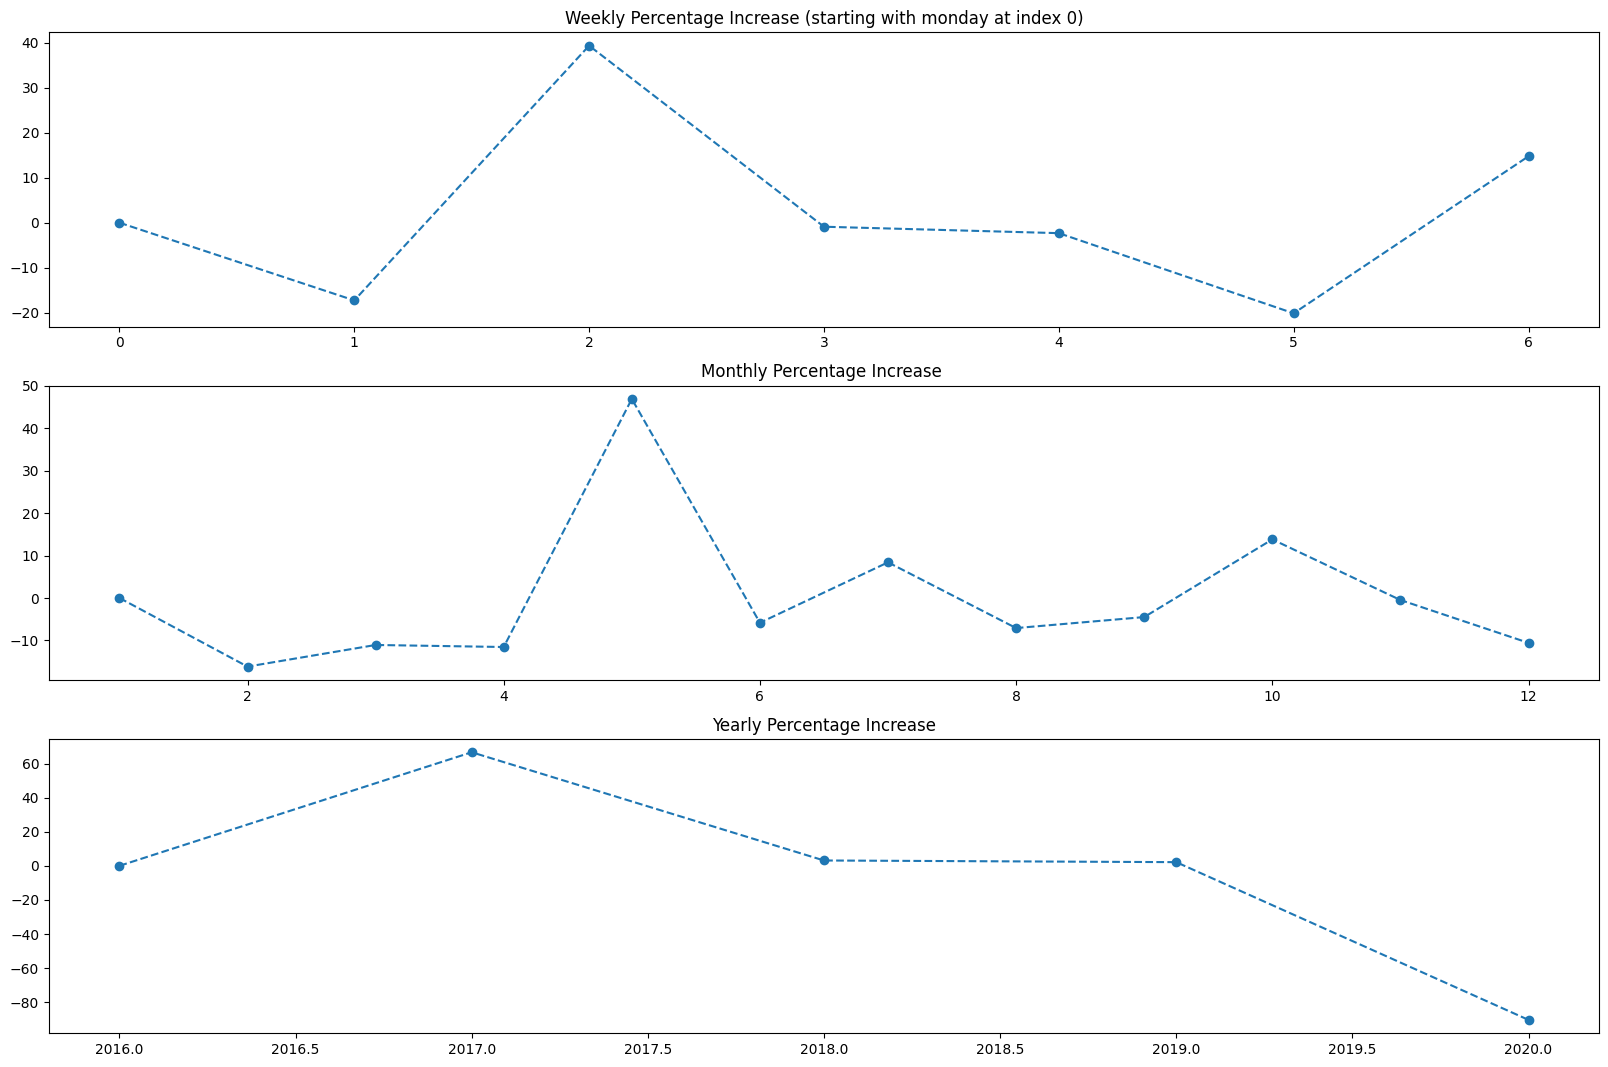

In [ ]:
AnomalyTimeSeriesDoW=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.dayofweek).sum().reset_index().rename(columns={"SalesDate": "Day", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesDoW.set_index("Day", drop=True, inplace=True)



# Aufgabe: Analysieren Sie analog zu oben die prozentuale Veränderung der Verkaufszahlen (SalesAmount) auf Monats- und Jahresbasis

In [ ]:
# Geben Sie hier Ihren Code ein...


























In [ ]:
AnomalyTimeSeriesMonth=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.month).sum().reset_index().rename(columns={"SalesDate": "Month", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesMonth.set_index("Month", drop=True, inplace=True)

AnomalyTimeSeriesYear=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.year).sum().reset_index().rename(columns={"SalesDate": "Year", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesYear.set_index("Year", drop=True, inplace=True)



# Aufgabe: Visualisieren Sie diese Entwicklungen, um saisonale Trends oder signifikante Abweichungen zu identifizieren.

In [ ]:
# Geben Sie hier Ihren Code ein...





























In [ ]:
AnomalyTimeSeriesDoW['PercentageIncrease']=(AnomalyTimeSeriesDoW.pct_change().fillna(0))*100
AnomalyTimeSeriesMonth['PercentageIncrease']=AnomalyTimeSeriesMonth.pct_change().fillna(0)*100
AnomalyTimeSeriesYear['PercentageIncrease']=AnomalyTimeSeriesYear.pct_change().fillna(0)*100

fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(20,13))
ax1.plot(AnomalyTimeSeriesDoW.PercentageIncrease,marker='o', linestyle='--')
ax1.set_title('Weekly Percentage Increase (starting with monday at index 0)');
ax2.plot(AnomalyTimeSeriesMonth.PercentageIncrease,marker='o', linestyle='--')
ax2.set_title('Monthly Percentage Increase ');
ax3.plot(AnomalyTimeSeriesYear.PercentageIncrease,marker='o', linestyle='--')
ax3.set_title('Yearly Percentage Increase');

In [ ]:
AnomalyTimeSeriesDoW
# from Monday to Tuesday: (391837-324108)/391837 =17% (decrease)

SalesAmountSum  PercentageIncrease
Day                                    
0            391837            0.000000
1            324108          -17.284994
2            451723           39.374221
3            447677           -0.895682
4            437262           -2.326454
5            349139          -20.153363
6            400717           14.772913

# Zerlegung einer Zeitreihenanalyse (Decomposition)

Unter "Decomposition" (Zerlegung) in der Zeitreihenanalyse versteht man die **Aufteilung einer Zeitreihe in ihre grundlegenden Komponenten**.

---

### Komponenten

Jede Zeitreihe kann in drei Hauptkomponenten zerlegt werden:

1.  **Trend:** Die langfristige Entwicklung der Daten, die einen Auf- oder Abwärtstrend zeigt.
2.  **Saisonalität:** Regelmäßige, wiederkehrende Schwankungen, die in festen Zeitintervallen (z.B. monatlich, quartalsweise oder jährlich) auftreten.
3.  **Rest (Residuen/Noise):** Die zufälligen, unerklärlichen Schwankungen in den Daten, die nach der Entfernung von Trend und Saisonalität übrig bleiben.

---

### Modelle

Die Beziehung zwischen diesen Komponenten kann entweder **additiv** oder **multiplikativ** sein.

* **Additives Modell:** Hierbei werden die Komponenten einfach addiert. Dies wird verwendet, wenn die Stärke der saisonalen Schwankungen über die Zeit konstant bleibt.  
$$Y_t = \text{Trend}_t + \text{Saisonalität}_t + \text{Rest}_t$$
* **Multiplikatives Modell:** Hierbei werden die Komponenten miteinander multipliziert. Dies ist nützlich, wenn die saisonalen Schwankungen mit dem Trend der Zeitreihe wachsen oder schrumpfen.  
    $$Y_t = \text{Trend}_t \times \text{Saisonalität}_t \times \text{Rest}_t$$


Man verwendet ein **additives Modell**, wenn die Stärke der saisonalen Schwankungen über die Zeit **konstant** bleibt. Im Gegensatz dazu greift man zu einem **multiplikativen Modell**, wenn die Amplitude (Größe) der saisonalen Schwankungen **proportional zum Trend** der Zeitreihe wächst oder schrumpft.

---

### Additives Modell

Ein additives Modell geht davon aus, dass die Komponenten der Zeitreihe (Trend, Saisonalität und Rest) einfach addiert werden. Es wird verwendet, wenn die saisonalen Schwankungen **unabhängig vom Niveau** der Zeitreihe sind. Das ist oft bei **stabilen Zeitreihen** der Fall, bei denen die jährlichen Schwankungen immer ungefähr gleich stark sind, unabhängig davon, ob der Gesamtwert der Reihe hoch oder niedrig ist.


**Beispiel:** Die monatliche Anzahl der verkauften E-Books in einem kleinen Verlag, die in den Sommermonaten immer um ca. 500 Exemplare höher liegt als im Jahresdurchschnitt, unabhängig davon, ob die Gesamtzahl der Verkäufe wächst oder schrumpft.

---

### Multiplikatives Modell

Ein multiplikatives Modell geht davon aus, dass die Komponenten miteinander multipliziert werden. Dies ist die richtige Wahl, wenn die Größe der saisonalen Schwankungen mit dem Anstieg des Trends ebenfalls **exponentiell zunimmt**. Das Muster hat hier nicht eine konstante absolute Abweichung, sondern eine **konstante prozentuale Abweichung** vom Trend. Das führt zu einem breiter werdenden "Fächer"-Muster im Zeitreihendiagramm.


**Beispiel:** Der weltweite Umsatz eines E-Commerce-Unternehmens, der in der Vorweihnachtszeit jedes Jahr um 30 % ansteigt. Da der Gesamtumsatz mit der Zeit wächst, wächst auch die absolute Höhe des weihnachtlichen Umsatzschubs.

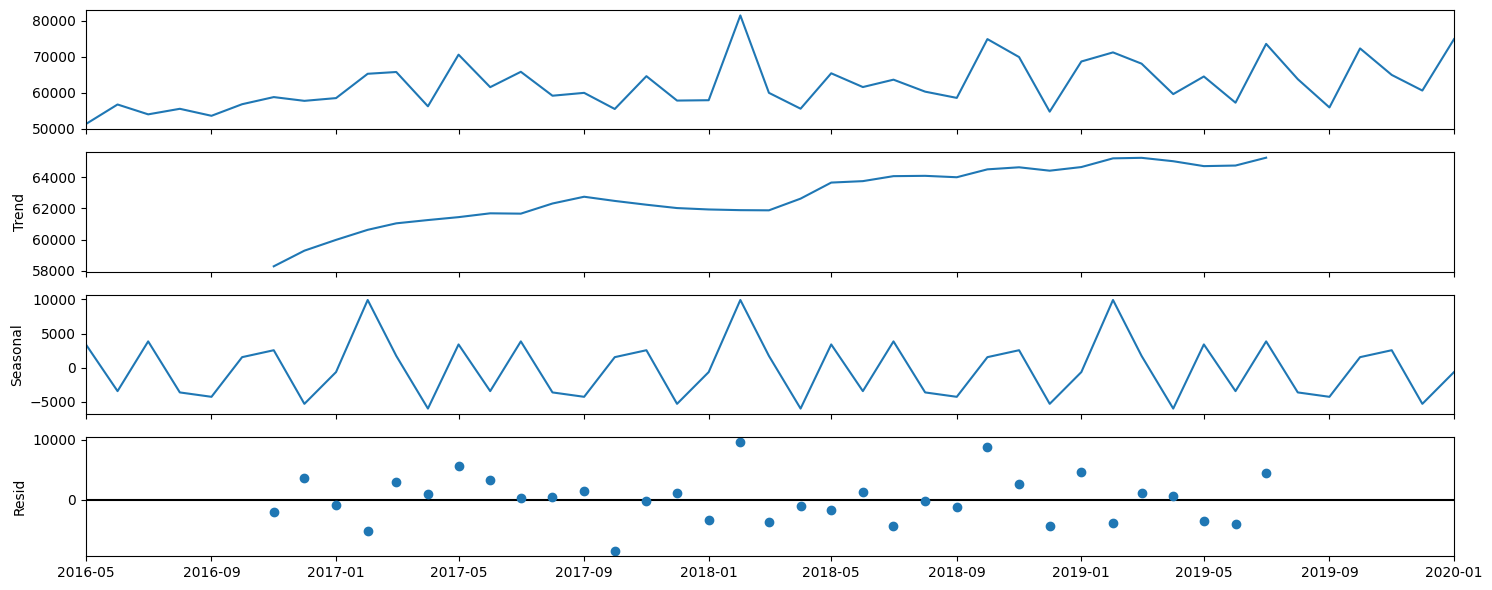

In [ ]:
#Depending on the nature of the trend and seasonality, a time series can be modelled as an additive or multiplicative, wherein,
#each observation in the series can be expressed as either a sum or a product of the components:

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.testing import assert_frame_equal

from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Check for any outliers and decide if they should be included before training your model
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
df = df.set_index('SalesDate')
MonthlyDf = df.resample('MS').sum()#D vs resample(ms); M monthhly vs D daily ws weekly w, M End of month, MS start of month


decomposition = sm.tsa.seasonal_decompose(MonthlyDf, model='additive')
#An additive (model is made up of observed, trend, seasonal and residual (noise) components) model is linear where changes
#over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and
#amplitude (height of cycles).
fig = decomposition.plot()
plt.show()
#trend is associated with the slope (increasing/decreasing) of the time series
#seasonality which is the deviations from the mean caused by repeating short-term cycles and
#noise is the random variation in the series

 # (Exponentiell gewichtete) gleitende Durchschnitte: Moving Averages und Exponentially Weighted Moving Averages

# Aufgabe: Fügen Sie den rollierenden Durchschnitt für 2 bzw. 10 Zeiträume hinz.  
Probieren Sie noch weitere wie z.B. Gaussian und Exponentiell gewichtet.

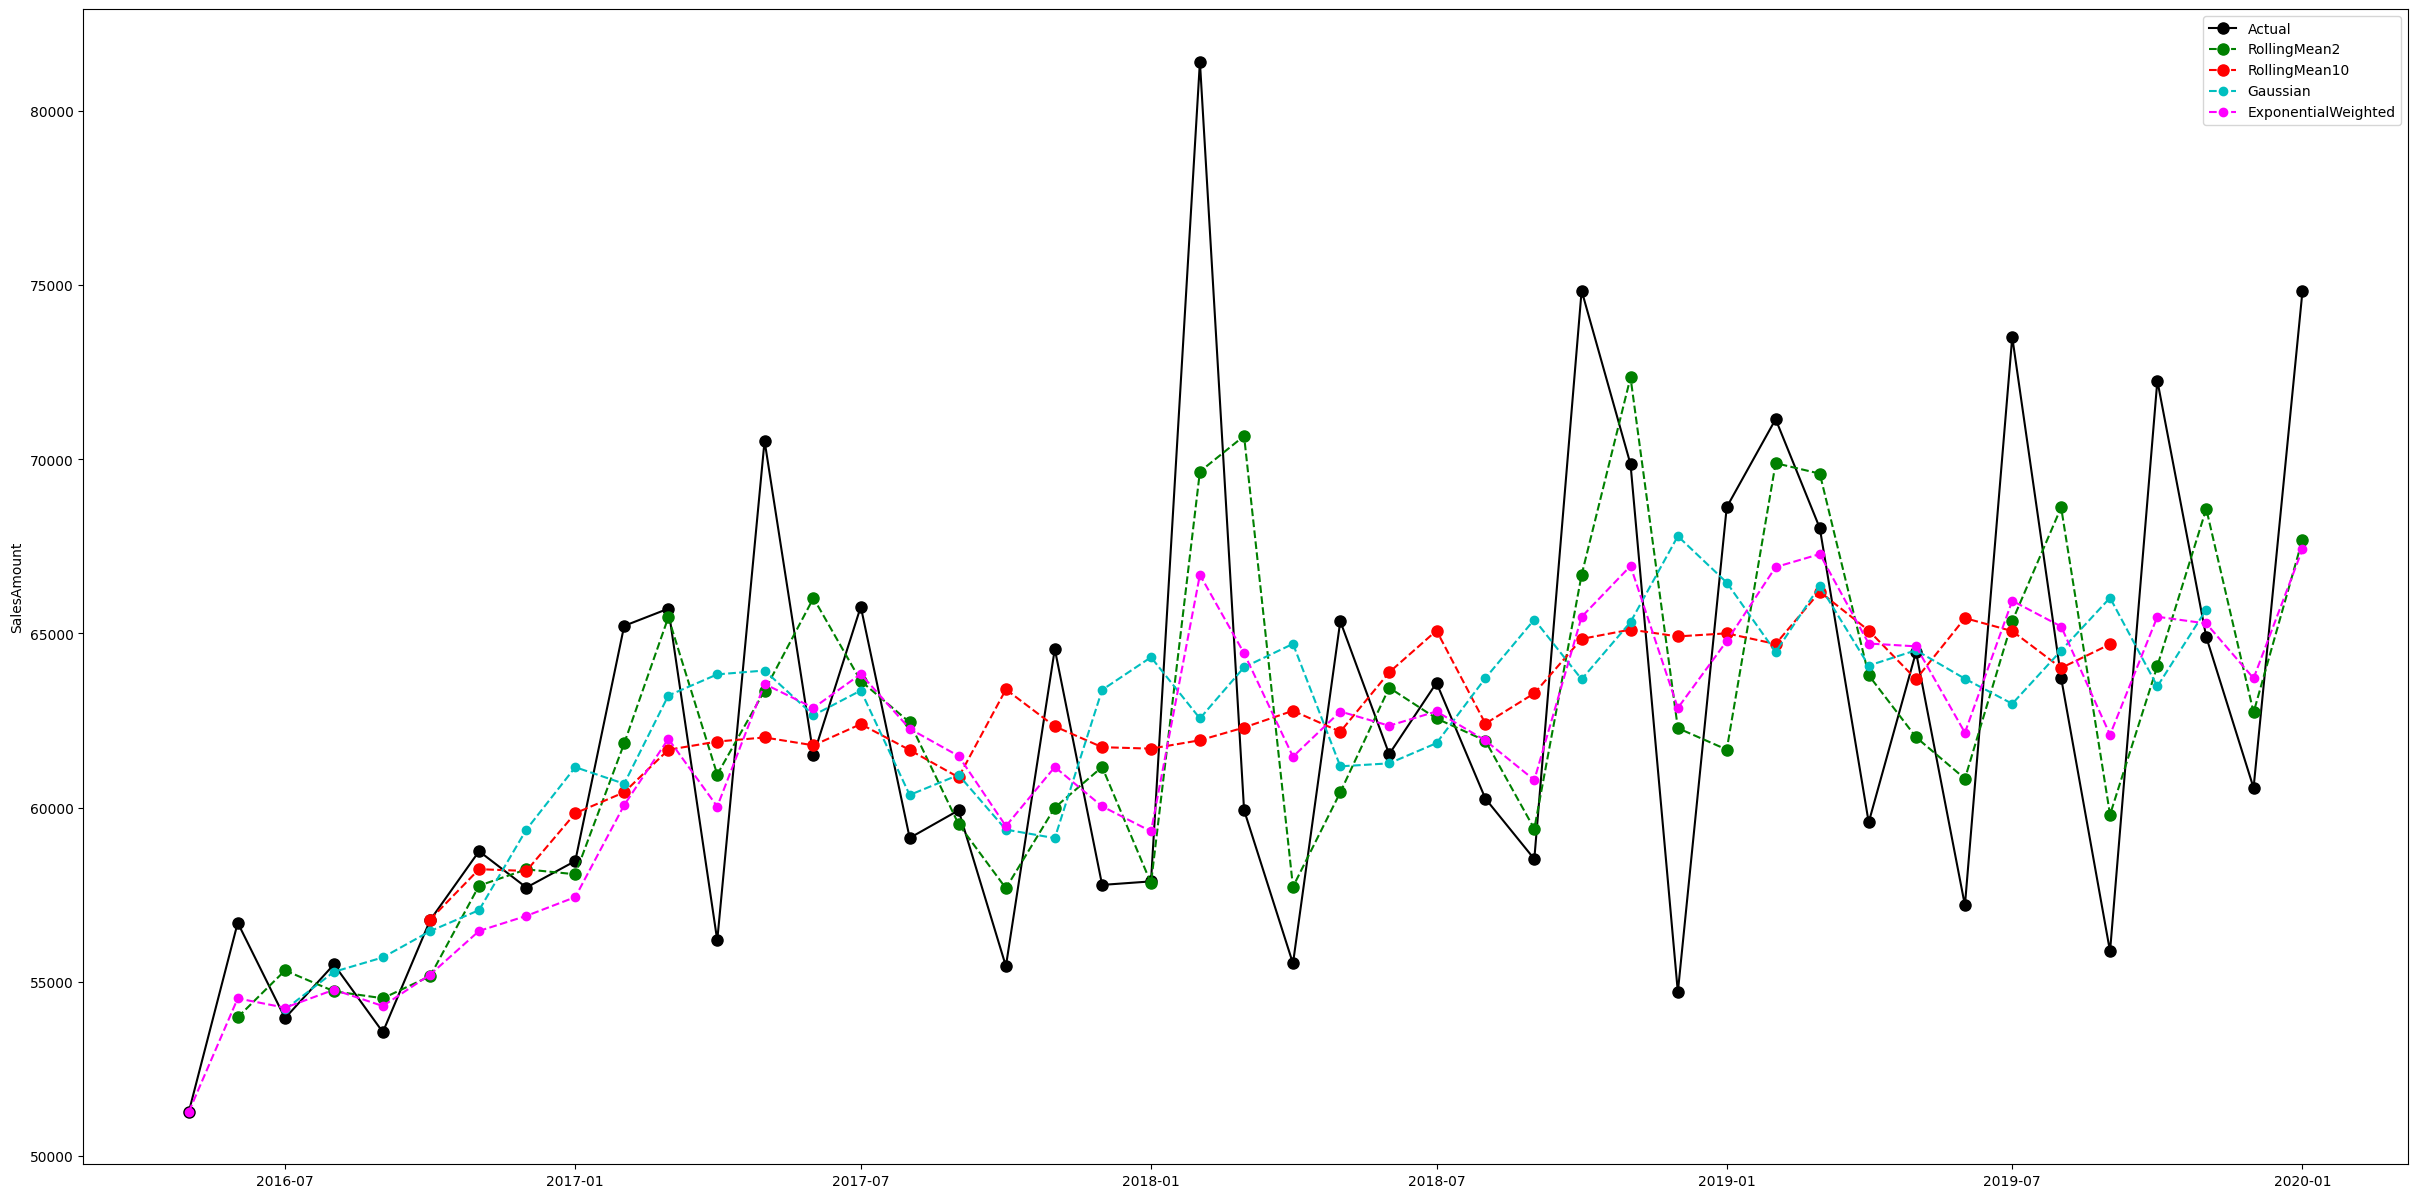

In [ ]:
# Moving Average is doing the mathematical average of a rolling window of defined width. You should choose the window-width wisely, a large window-size will over-smooth the series. A window-size bigger than or equal to the
# seasonal duration will effectively nullify the seasonal effect.


start, end = '2016-04-01', '2020-02-01'

fig, ax = plt.subplots(figsize=(30,15))

ax.plot(AnomalyTimeSeries.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Actual',color='k')

ax.plot(AnomalyTimeSeries.rolling(window=2,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='RollingMean2',color='g')

# Geben Sie hier Ihren Code ein...




ax.set_ylabel('SalesAmount')
ax.legend();

In [ ]:
start, end = '2016-04-01', '2020-02-01'

fig, ax = plt.subplots(figsize=(30,15))

ax.plot(AnomalyTimeSeries.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Actual',color='k')



ax.plot(AnomalyTimeSeries.rolling(window=10,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='RollingMean10',color='r')

ax.plot(AnomalyTimeSeries.rolling(window=5, win_type='gaussian',center=True).mean(std=10).loc[start:end],
marker='o', linestyle='--', label='Gaussian',color='c')


ax.plot(AnomalyTimeSeries.ewm(span=5).mean().loc[start:end],
marker='o', linestyle='--', label='ExponentialWeighted',color='magenta')


ax.set_ylabel('SalesAmount')
ax.legend();



### Gleitender Durchschnitt (Moving Average)
Der gleitende Durchschnitt berechnet den Durchschnitt von Werten innerhalb eines **festen Fensters**. Dieses Fenster "bewegt" sich über die Zeitreihe.  Im Code werden zwei Varianten verwendet:
* **`rolling(window=2 oder 10)`**: Berechnet den einfachen Durchschnitt der letzten zwei (bzw. 10) Werte. Dies führt zu einer leichten Glättung (bzw. stärkeren Glättung, wodurch kurzfristige Schwankungen (Rauschen) reduziert werden).


### Gaußscher gleitender Durchschnitt (Gaussian Moving Average)
* **`rolling(window=5, win_type='gaussian')`**: Diese Methode verwendet eine **Gauß-Funktion** als Gewichtung für die Datenpunkte im Fenster. Punkte in der Mitte des Fensters erhalten ein höheres Gewicht, während Punkte an den Rändern ein geringeres Gewicht erhalten. Dies ist eine komplexere Form der Glättung, die sanftere Übergänge ermöglicht als der einfache gleitende Durchschnitt.

### Exponentiell gewichteter gleitender Durchschnitt (Exponentially Weighted Moving Average)
* **`ewm(span=5)`**: Bei dieser Methode werden die Datenpunkte exponentiell gewichtet. Neuere Werte in der Zeitreihe erhalten ein **höheres Gewicht** als ältere Werte. Dies ermöglicht es dem Modell, schneller auf aktuelle Veränderungen zu reagieren als ein einfacher gleitender Durchschnitt.

# Aufgabe: Wenden Sie weitere statistische Modelle an
z.B. Double Exponential Smoothing, Double Smoothing with Damped Trend, Triple Exponential Smoothing, Triple Additive Exponential Smoothing..

In [ ]:
# Geben Sie hier Ihren Code ein..




















**Holt-Modelle** (auch „Holt’s linear trend method“) sind exponentielle Glättungsmodelle. Damit stellen Sie eine **Erweiterung** der einfachen exponentiellen Glättung dar:



* **Einfache exponentielle Glättung** glättet nur den Level (den Grundwert der Zeitreihe) und eignet sich daher nur für Reihen ohne Trend.
* **Holt-Modelle** fügen eine zweite Glättungskomponente hinzu, die den Trend separat modelliert.
* Dadurch ergibt sich eine zweistufige exponentielle Glättung:

  1. Glättung des Levels
  2. Glättung der Steigung (Trend)

Mathematisch bleibt es also bei exponentieller Glättung, nur eben **auf zwei Komponenten gleichzeitig**. Man spricht deshalb von *doppelter exponentieller Glättung*.




* `.fit(...)`: Diese Methode passt das Modell an die Daten an.
    * `smoothing_level=0.1`: Dieser Parameter, auch Alpha genannt, steuert, wie stark der aktuelle Wert der Zeitreihe (im Gegensatz zu früheren Werten) die Glättung beeinflusst. Ein Wert von 0.1 bedeutet, dass die Glättung sehr stark ist und vergangene Werte mehr Gewicht haben. Gewicht des aktuellen Niveaus gegenüber dem vorherigen geglätteten Niveau (langsame Anpassung, starker Glättungseffekt).
    * `smoothing_slope=0.3`: Dieser Parameter, auch Beta genannt, steuert die Glättung des Trends. Ein Wert von 0.3 bedeutet, dass die Glättung des Trends mäßig ist.
    * `optimized=False`: Dieser Parameter bedeutet, dass die Methode die optimalen Werte für **smoothing_level** und **smoothing_slope** nicht automatisch berechnet. Stattdessen werden die von dir festgelegten Werte verwendet.

Zuletzt gibt die Zeile `fit1.fittedvalues` die geschätzten Werte des Modells zurück. Dies sind die Werte, die das Modell für jeden Datenpunkt in der Zeitreihe als die "geglättete" oder angepasste Version der Originaldaten berechnet hat.

In [ ]:
from statsmodels.tsa.api import Holt

fit1=Holt(AnomalyTimeSeries.SalesAmount).fit(smoothing_level=0.1, smoothing_slope=0.3, optimized=False)
fit1.fittedvalues
#ax.plot(AnomalyTimeSeries.ewm(span=5).mean().loc[start:end],
#marker='o', linestyle='--', label='ExponentialWeighted',color='magenta')

/tmp/ipython-input-2326228608.py:3: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.



SalesDate
2016-05-01    56692.000000
2016-06-01    61413.490000
2016-07-01    66063.886300
2016-08-01    69612.146381
2016-09-01    72536.296062
2016-10-01    74404.101894
2016-11-01    75877.644085
2016-12-01    76887.682735
2017-01-01    77117.007038
2017-02-01    76839.938699
2017-03-01    76917.089033
2017-04-01    76699.741663
2017-05-01    74936.216780
2017-06-01    74651.257882
2017-07-01    73097.387137
2017-08-01    71905.721853
2017-09-01    69785.761441
2017-10-01    67661.254227
2017-11-01    64935.110108
2017-12-01    63380.917098
2018-01-01    61136.685876
2018-02-01    59029.277199
2018-03-01    60157.551074
2018-04-01    59017.251030
2018-05-01    57445.983459
2018-06-01    57251.693141
2018-07-01    56823.471061
2018-08-01    56845.727057
2018-09-01    56635.465642
2018-10-01    56329.426399
2018-11-01    58241.628288
2018-12-01    59812.501140
2019-01-01    59557.501673
2019-02-01    60992.357102
2019-03-01    62841.116275
2019-04-01    64347.686042
2019-05-01    64715.518251
2019-06-01    65528.181692
2019-07-01    65282.093339
2019-08-01    66939.511020
2019-09-01    67355.661603
2019-10-01    66600.557279
2019-11-01    67729.386669
2019-12-01    67924.521520
2020-01-01    67445.957241
Freq: MS, dtype: float64

# FBProphet

Facebook **Prophet** ist eine quelloffene Python-Bibliothek, die für die **Prognose von Zeitreihendaten** entwickelt wurde. Sie eignet sich besonders für Zeitreihen, die starke saisonale Effekte über mehrere Saisons aufweisen (z. B. Wochen-, Monats- und Jahreszyklen) und bei denen historische Ausreißer oder fehlende Datenpunkte vorkommen.



In [ ]:
pip install prophet

In [ ]:
AnomalyTimeSeries = AnomalyTimeSeries.reset_index().dropna() #reseting index, so we get back two columns again
AnomalyTimeSeries.columns = ['ds', 'y'] #we will use a Package called Prophet later on on this, which needs the input to be called ds for time and y for our SalesAmount
AnomalyTimeSeries.head()

ds      y
0 2016-05-01  51265
1 2016-06-01  56692
2 2016-07-01  53954
3 2016-08-01  55496
4 2016-09-01  53552

In [ ]:
#Using Prophet to spot unusual datapoints: black dots are actual datapoints, blue line is predicted by Facebook`s Prophet, and blue shade represents 95% confidence interval: any black dotted actuals
#outside the blue shade can be estimated as extraordinary values within this specific time series
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
m = Prophet(seasonality_mode='additive',interval_width=0.95).fit(AnomalyTimeSeries) #additive vs multiplicative seasonality, 95% Konfidenzintervall
future = m.make_future_dataframe(periods=0, freq='MS')# replace 0 by eg 12, to make a prediction for the next 12 months; vs just periods=365 --> which works well for weekly and daily
fcst = m.predict(future)
fig = plot_plotly(m,fcst)
fig.show(renderer="colab") #use this if you run it on Colab

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_sqndul/ahzf3lf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_sqndul/8ieeynk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80058', 'data', 'file=/tmp/tmpo_sqndul/ahzf3lf6.json', 'init=/tmp/tmpo_sqndul/8ieeynk3.json', 'output', 'file=/tmp/tmpo_sqndul/prophet_model_kcx_xrk/prophet_model-20250828185859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:58:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




 Das Modell wird auf die Daten trainiert (inkl. ungewöhnliche Datenpunkte) und prognostiziert die Werte der Zeitreihe.

1.  **`from prophet import Prophet`**: Importiert die Prophet-Klasse.

2.  **`m = Prophet(...).fit(AnomalyTimeSeries)`**: Initialisiert und trainiert das Prophet-Modell (`m`).
    * `seasonality_mode='additive'`: Hier wird das Modell so eingestellt, dass saisonale Effekte zur Trendlinie **addiert** werden. Dies ist die Standardeinstellung und funktioniert gut bei Zeitreihen, bei denen die Saisonalität konstant bleibt.
    * `interval_width=0.95`: Definiert die Breite des **Konfidenzintervalls** von 95 %. Das bedeutet, dass die blauen Schattierungen (im Bild) den Bereich repräsentieren, in dem die wahren Werte mit 95 %iger Wahrscheinlichkeit liegen.

3.  **`future = m.make_future_dataframe(periods=0, freq='MS')`**: Erstellt einen DataFrame mit den zukünftigen Zeitstempeln, für die eine Prognose erstellt werden soll.
    * `periods=0`: Da keine zukünftigen Werte prognostiziert werden sollen, sondern nur die Anomalien in der Vergangenheit, wird `periods` auf 0 gesetzt.
    * `freq='MS'`: Setzt die Frequenz der Zeitreihe auf monatlichen Start (`MS`), was sich auf die Art und Weise auswirkt, wie die Daten interpretiert werden.

4.  **`fcst = m.predict(future)`**: Verwendet das trainierte Modell (`m`), um die Werte für die Zeitstempel im `future`-DataFrame zu prognostizieren.

5.  **`fig = plot_plotly(m,fcst)`**: Erzeugt eine interaktive Grafik.
    * Die **schwarzen Punkte** sind die tatsächlichen Datenpunkte.
    * Die **blaue Linie** ist die vom Prophet-Modell prognostizierte Zeitreihe.
    * Die **blaue Schattierung** ist das 95 %-Konfidenzintervall.

**Anomalie-Erkennung:** Jeder schwarze Punkt, der **außerhalb der blauen Schattierung** liegt, wird als potenzieller **Ausreißer** oder "außergewöhnlicher Wert" innerhalb der Zeitreihe angesehen.

# Aufgabe: Experimentieren Sie mit den unterschiedlichen Parametern
z.B. seasonality, Konfidenzintervall etc

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
fig2=plot_components_plotly(m, fcst)
fig2.show(renderer="colab")

#in case you want to display the chart static
#fig2 = m.plot_components(fcst)

/usr/local/lib/python3.12/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



Die `plot_components_plotly` Funktion von Prophet zeigt die **einzelnen Komponenten** des Prognosemodells. Sie zerlegt die Zeitreihe in ihre grundlegenden Bestandteile, um die Muster zu visualisieren, die das Modell gelernt hat.

### Aufschlüsselung der Komponenten

Das Prophet-Modell zerlegt eine Zeitreihe typischerweise in drei Hauptkomponenten:

1.  **Trend:** Dies ist die langfristige, nicht-periodische Entwicklung der Zeitreihe. Der Trend fängt die allgemeine Richtung der Daten über einen längeren Zeitraum ein.

2.  **Saisonalität:** Diese Komponente erfasst die regelmäßigen, sich wiederholenden Muster, die über bestimmte Zeitintervalle auftreten (z. B. wöchentliche, monatliche oder jährliche Zyklen). Der `plot_components_plotly`-Plot zeigt separate Grafiken für jede identifizierte Saisonalität (z. B. `weekly` und `yearly`).

3.  **Feiertage/Ereignisse:** Diese Komponente (falls im Modell definiert) berücksichtigt die Auswirkungen von Feiertagen oder anderen bekannten Ereignissen auf die Zeitreihe.

### Funktion des Codes

* **`fig2=plot_components_plotly(m, fcst)`**: Diese Zeile ruft die Funktion auf.
    * `m`: Das trainierte Prophet-Modell.
    * `fcst`: Der DataFrame mit den Prognose-Werten.

Die Funktion verwendet die von Prophet gelernten Muster und erzeugt eine interaktive Grafik (`fig2`), die die isolierten Trend- und Saisonalitätskomponenten anzeigt. Dies ist nützlich, um die zugrunde liegenden Muster zu verstehen, die die Zeitreihe steuern, und um zu sehen, wie das Modell die zukünftigen Werte prognostiziert.

# Aufgabe: Zeigen Sie die Residuen (Residuals) an  
Mit Residuals ist in Trainings- bzw. Fit-Daten die Differenz zwischen tatsächlichen und vorhergesagten Werten gemeint.

In [ ]:
# Geben Sie hier Ihren Code ein..

In [ ]:
# Berechnung der Residuen
residuals = AnomalyTimeSeries['y'] - fcst['yhat']

# Erstellen Sie einen neuen DataFrame für die Residuen
residuals_df = pd.DataFrame({
    'ds': AnomalyTimeSeries.index,
    'residuals': residuals.values
})

# Plotten der Residuen
fig_res = go.Figure()
fig_res.add_trace(go.Scatter(x=residuals_df['ds'], y=residuals_df['residuals'], mode='markers', name='Residuals'))
fig_res.add_hline(y=0, line_dash="dash", line_color="red")
fig_res.update_layout(title_text='Residuals', xaxis_title='Date', yaxis_title='Residuals')
fig_res.show(renderer="colab")



### Interpretation

  * **Die Residuen-Grafik:** Zeigt die Abweichungen zwischen den tatsächlichen und den vorhergesagten Werten.
  * **Streuung um null:** Idealerweise sollten die Residuen gleichmäßig um die Nulllinie (`y=0`) gestreut sein.
  * **Muster in den Residuen:** Wenn Sie Muster (z. B. eine steigende oder fallende Tendenz, oder Saisonalität) in den Residuen sehen, deutet dies darauf hin, dass das Modell nicht alle Strukturen in der Zeitreihe erfasst hat und möglicherweise verbessert werden muss.
  * **Größe der Residuen:** Große Abweichungen deuten auf Ausreißer oder ungewöhnliche Ereignisse hin, die das Modell nicht vorhersagen konnte.

# SPC

Die Grundidee der **Statistische Prozessregelung (SPC)** besteht darin, Datenpunkte nicht isoliert zu betrachten, sondern sie in Bezug auf den gesamten Prozess und dessen natürliche Schwankungen einzuordnen. Ziel ist es, zwischen normaler Prozessvariation (natürliches Rauschen) und signifikanten Abweichungen zu unterscheiden. Dadurch können wir Probleme frühzeitig erkennen, Korrekturmaßnahmen einleiten und langfristig eine stabile Prozessqualität sicherstellen.


Im Mittelpunkt stehen **Kontrollkarten**, die den Prozessverlauf über die Zeit darstellen. Sie zeigen, ob ein Prozess nur zufälligen Schwankungen (Common Cause Variation) unterliegt oder ob **Sonderursachen** (Special Cause Variation) vorliegen, die korrigiert werden müssen.



/tmp/ipython-input-638755497.py:16: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



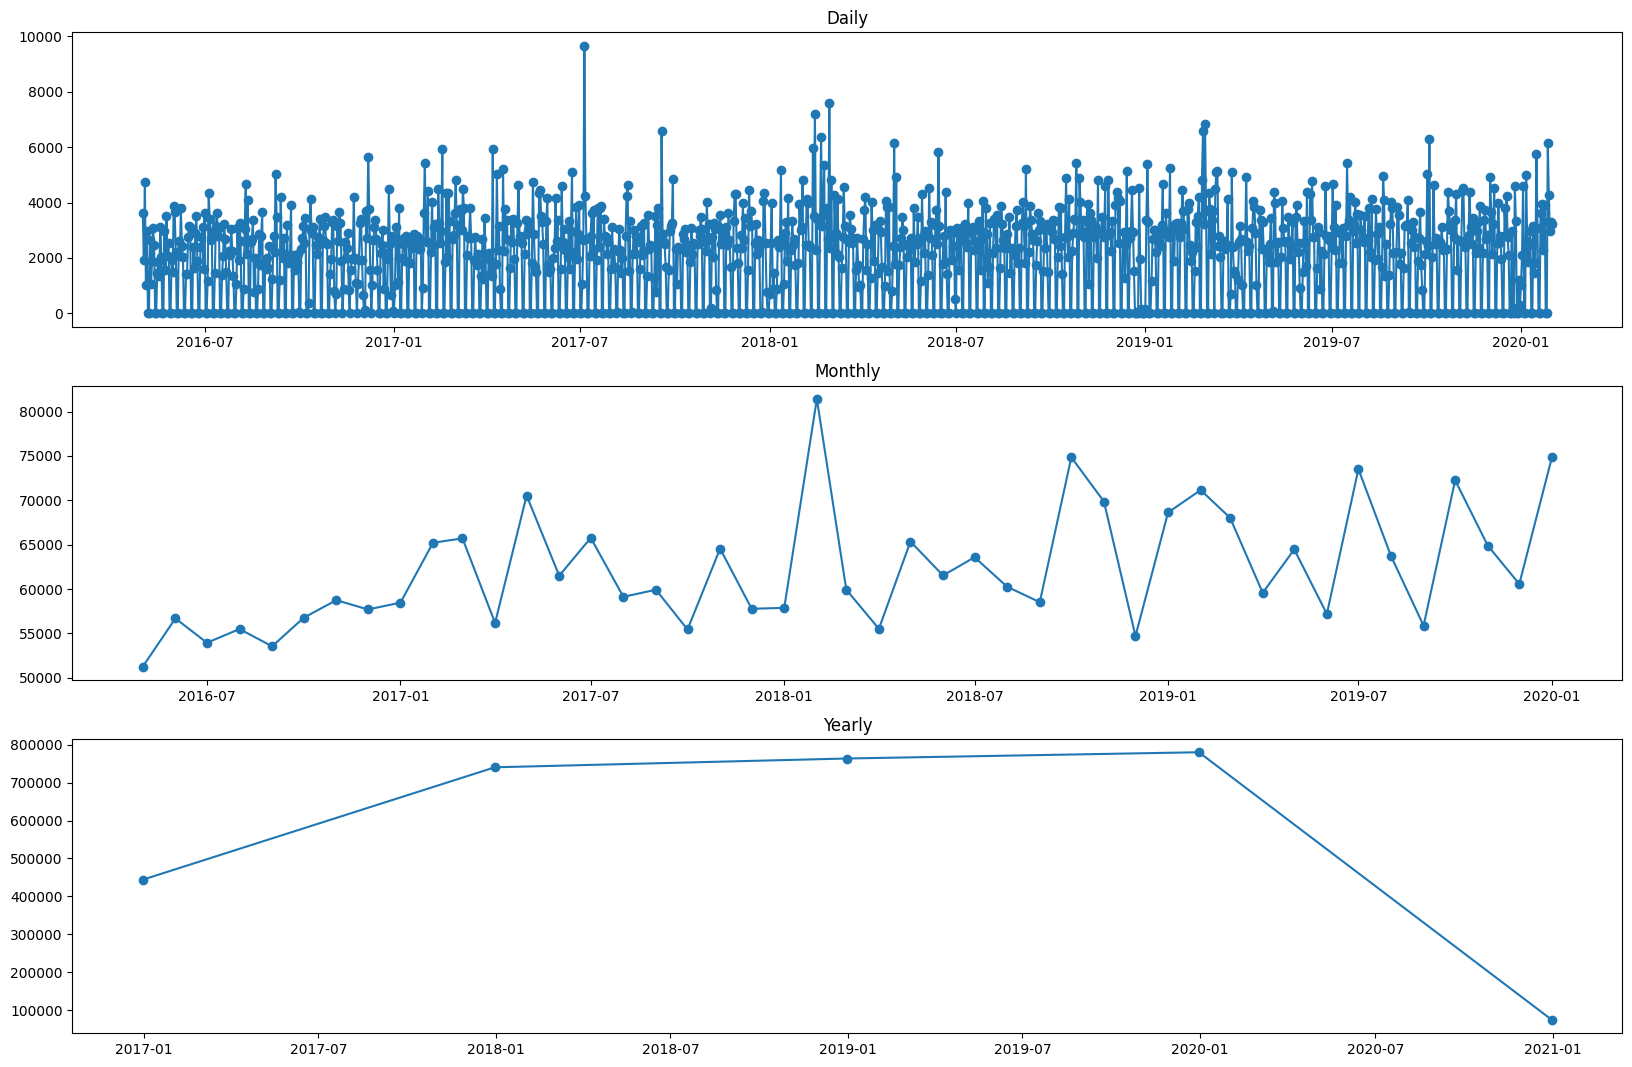

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx",parse_dates=['SalesDate'], usecols="A,C") # we only import column A and column C, SalesDate and SalesAmount
#df = pd.read_excel('DDDD.xlsx',parse_dates=['SalesDate'], usecols="A,C") # we only import column A and column C, SalesDate and SalesAmount

TimeSeriesGroup = df.set_index('SalesDate')
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(20,13))

# note that all days in between our time series get plotted, even if no sales exist. That's the reason for the many 0 values.
ax1.plot(TimeSeriesGroup['SalesAmount'].resample('D').sum(),marker='o')
ax1.set_title('Daily');

ax2.plot(TimeSeriesGroup['SalesAmount'].resample('MS').sum(),marker='o')
ax2.set_title('Monthly');

ax3.plot(TimeSeriesGroup['SalesAmount'].resample('A').sum(),marker='o')
ax3.set_title('Yearly');

# Aufgabe: Fassen Sie die Werte in unterschiedlichen Aggregationsstufen zusammen  
Welchen Unterschied macht es, wenn man anstatt Summenbildung z.B. den Mittelwert oder den Median bildet..

In [ ]:
# Geben Sie hier Ihren Code ein...




















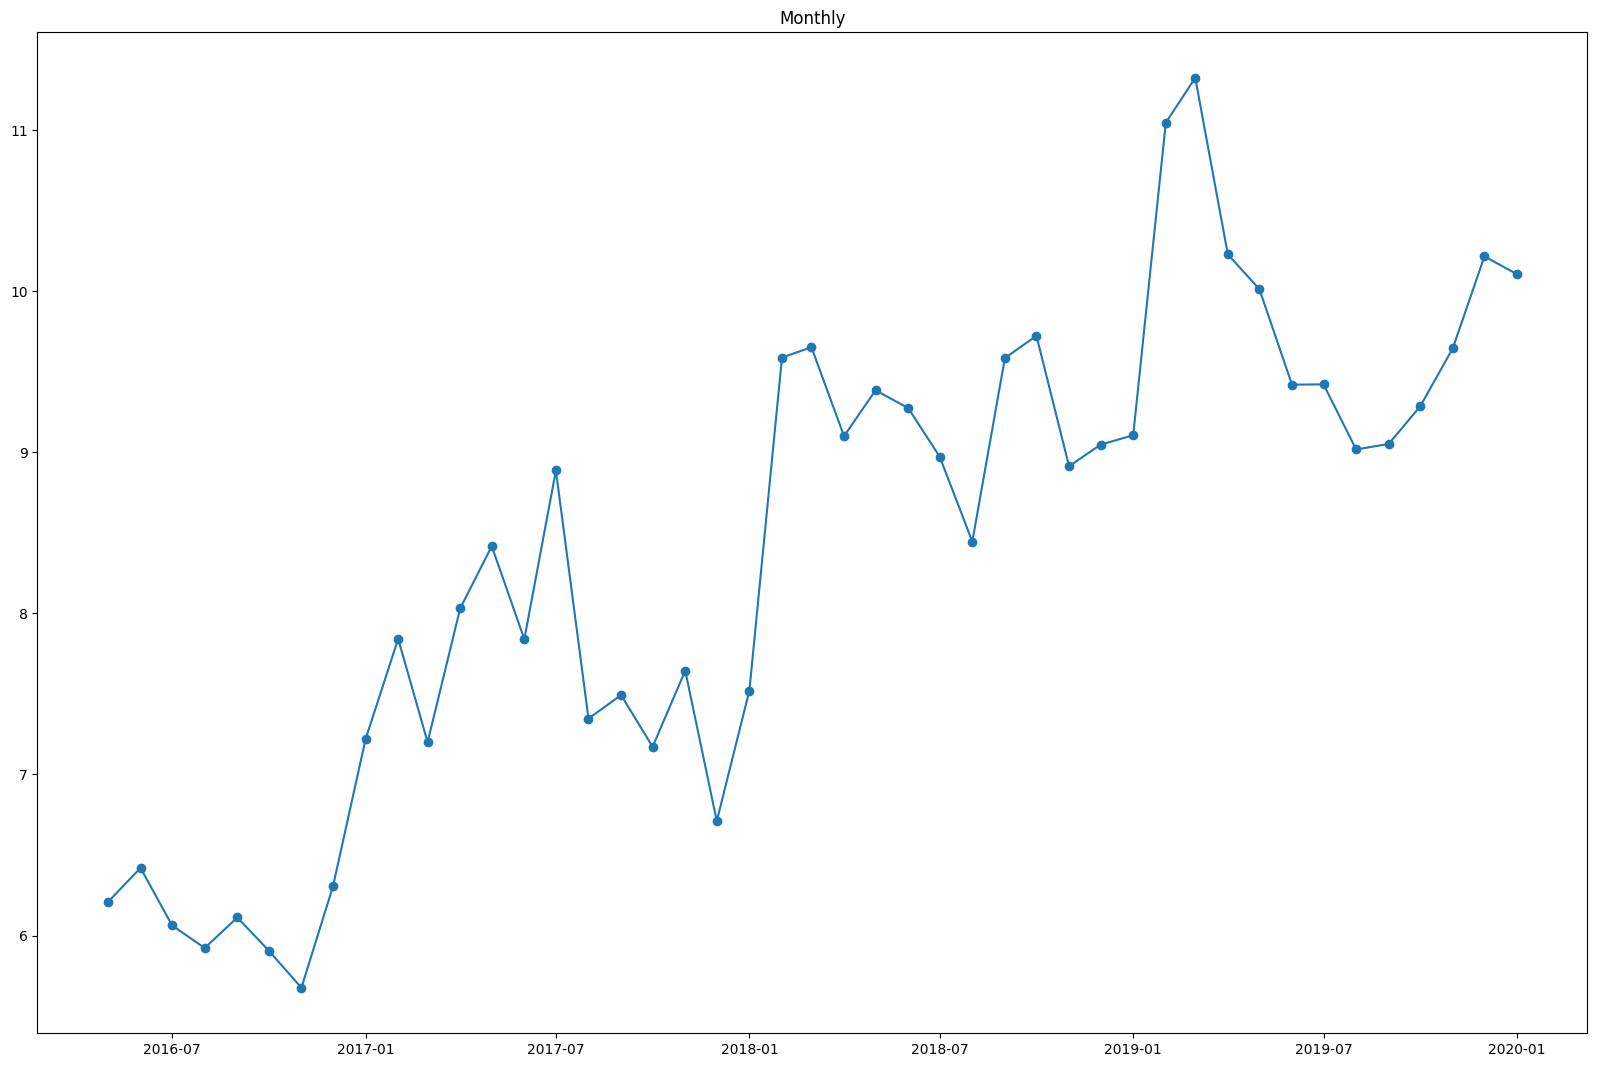

In [ ]:
# Averages will result in loss of information and smoothes data.
fig, (MonthlyMean) = plt.subplots(1,figsize=(20,13))
MonthlyMean.plot(TimeSeriesGroup['SalesAmount'].resample('MS').mean(),marker='o')
MonthlyMean.set_title('Monthly');
# From daily to monthly we can clearly see the overall rising positive sales trend.

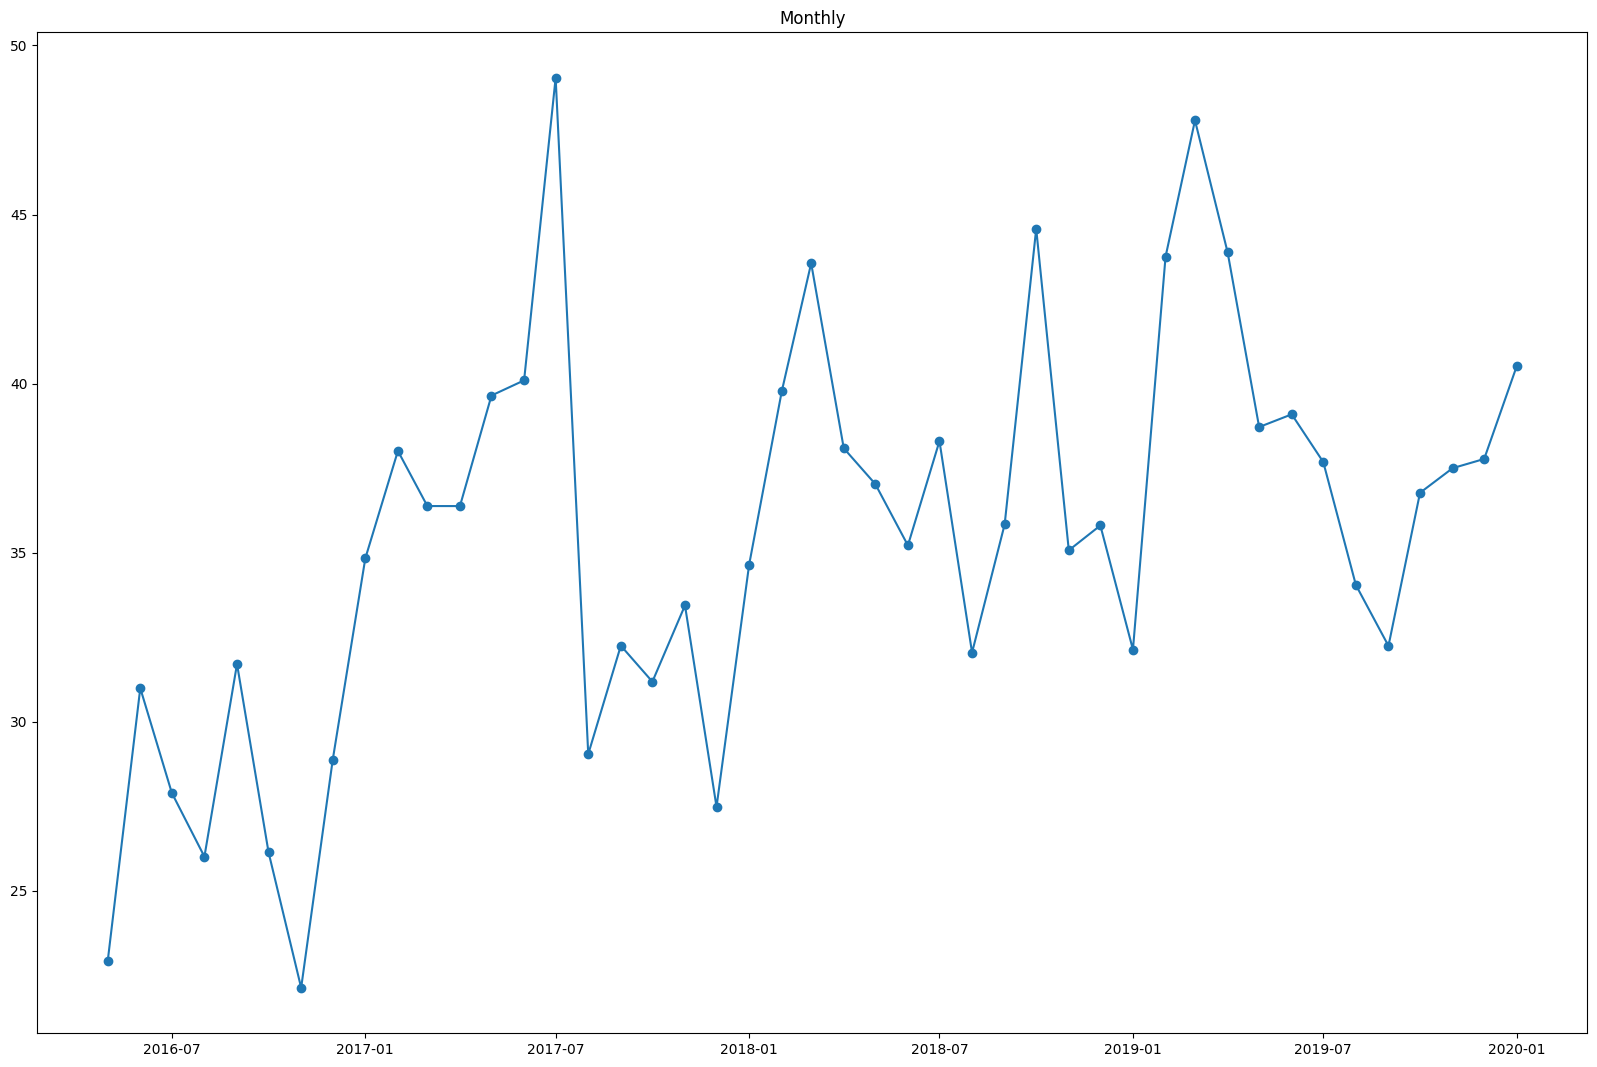

In [ ]:
# Mean and Sum alone are not enough, we also need to understand the range in our sales activities. The standard deviation will
# tell us how much variance around the mean we can expect in our sales.
fig, (MonthlyStd) = plt.subplots(1,figsize=(20,13))
MonthlyStd.plot(TimeSeriesGroup['SalesAmount'].resample('MS').std(),marker='o')
MonthlyStd.set_title('Monthly');

# Prozentuale Veränderung
Die Funktion `.pct_change()` berechnet die **prozentuale Veränderung** jedes Werts im Vergleich zum direkt vorhergehenden Wert in der Zeitreihe.
 Das Ergebnis ist eine neue Serie, die die prozentuale Zunahme oder Abnahme für jeden Monat zeigt.


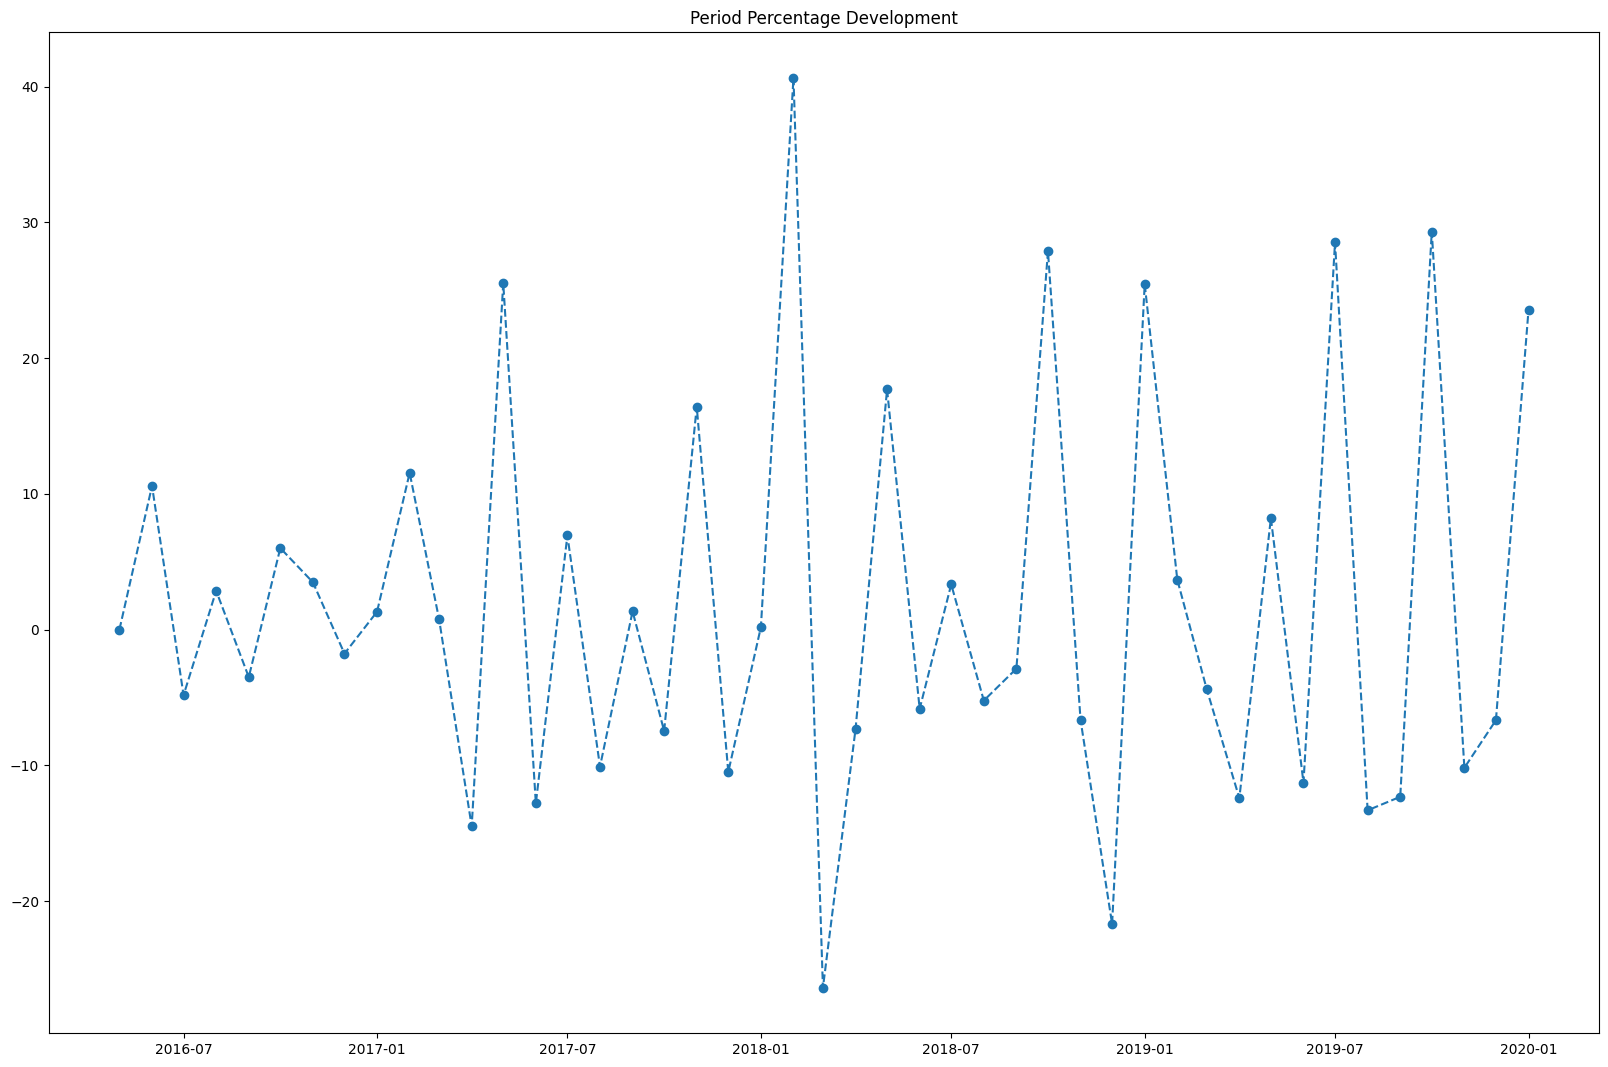

In [ ]:
MonthDevelop = df.set_index('SalesDate')
PeriodDevelop = MonthDevelop.resample('MS').sum() # grouping SalesAmount on a monthly basis, for each Month Start 'MS'
PeriodDevelop['PercentageDevelopment']=PeriodDevelop.pct_change().fillna(0)*100
fig, (ax1) = plt.subplots(1,figsize=(20,13))
ax1.plot(PeriodDevelop.PercentageDevelopment,marker='o', linestyle='--')
ax1.set_title('Period Percentage Development');

In [ ]:
#PeriodDevelop # e.g. (51265-56692)/51265 --> 0.1058617 *100% (positive increase)

Jetzt verwenden wir die Funktion `.loc`, um eine **datumsbasierte Auswahl** zu treffen. Sie filtert den `BoxPlot`-DataFrame, sodass nur die Zeilen für den Zeitraum vom **1. Januar 2018 bis zum 31. Januar 2018** ausgewählt werden.



`loc` ist ein Label-basierter Indexer in Pandas, der verwendet wird, um Datenzeilen und -spalten anhand ihrer Labels (hier die Datumsangaben) auszuwählen.

`BoxPlot.loc['2018-01-01':'2018-01-31']` bewirkt, dass:

* Der DataFrame `BoxPlot` nach den Indizes durchsucht wird. Da er zuvor mit `.set_index('SalesDate')` und `.resample('d')` erstellt wurde, sind die Indizes die täglichen Daten.
* Die Slicing-Syntax `[start:end]` wählt alle Zeilen aus, deren Indizes in diesem angegebenen Datumsbereich liegen. **Wichtig:** Im Gegensatz zu Python-Slices ist der Endpunkt bei `.loc` **inklusive**. Das bedeutet, der 31. Januar 2018 wird mit in die Auswahl aufgenommen.

In [ ]:
import plotly.express as px
DaysPerMonth = df.set_index('SalesDate')
BoxPlot = DaysPerMonth.resample('d').sum() # grouping SalesAmount on a daily level
BoxPlotJan2018=BoxPlot.loc['2018-01-01':'2018-01-31']
fig = px.box(BoxPlotJan2018, y=BoxPlotJan2018['SalesAmount'])
fig.show()

# Quality Control Chart (QCC)

Wäre es nicht praktisch, die monatlichen Gesamtsummen, den Gesamtmittelwert, die gleitende Spanne (Moving Range) und die Standardabweichung in einer einzigen Übersicht zu kombinieren? So könnten wir ungewöhnliche Verkaufszahlen im Zeitverlauf leichter erkennen.

Die Kontrollkarte (Quality Control Chart, QCC) ist dabei das zentrale Werkzeug der SPC. Sie kombiniert eine grafische Darstellung der Prozessdaten mit statistisch fundierten Grenzen, um Abweichungen vom erwarteten Verhalten sichtbar zu machen. Durch die kontinuierliche Beobachtung dieser Karten können wir Trends, plötzliche Sprünge oder Muster erkennen, die auf strukturelle Änderungen im Prozess hinweisen.

Der Einsatz von SPC bietet folgende Vorteile:

- Früherkennung von Prozessproblemen noch bevor fehlerhafte Produkte entstehen,

- Verbesserte Prozessstabilität durch gezielte Ursachenanalyse,

- Dauerhafte Qualitätssicherung unabhängig vom eingesetzten Fertigungsverfahren oder Geschäftsbereich.

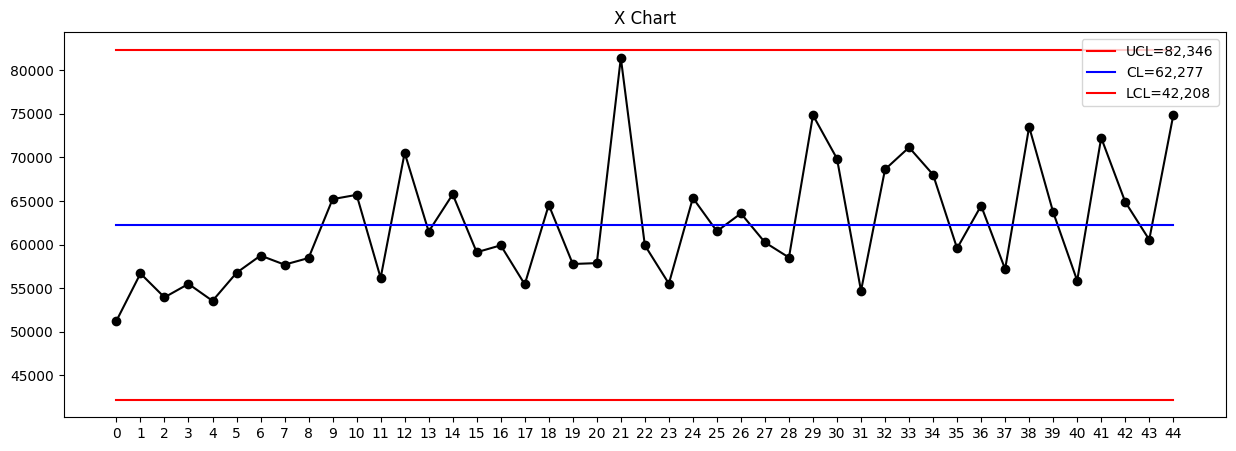

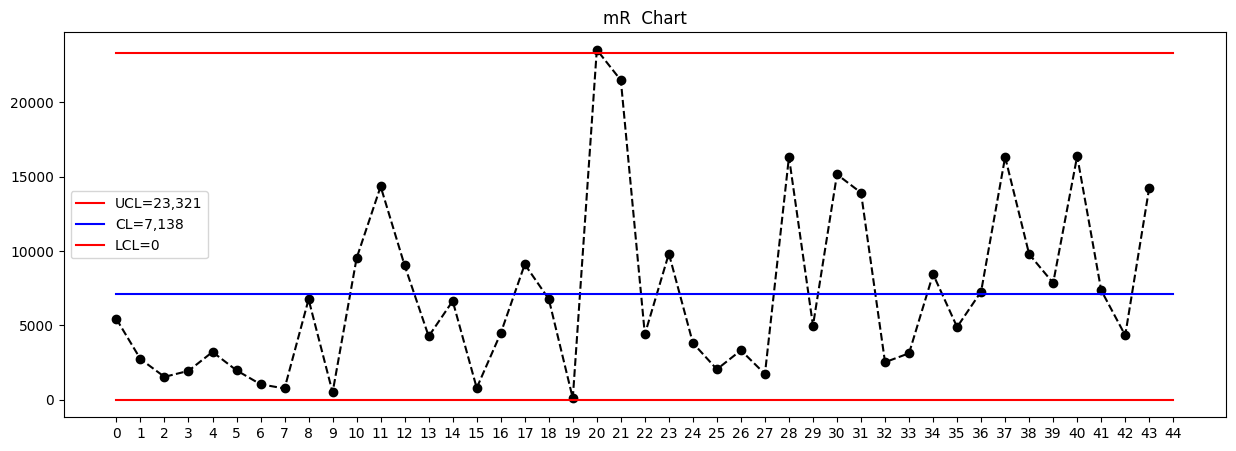

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SPC:
    def fit(self,data):
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])
    def QCC(self):
        ucl_X   = self.X.mean() + (3*self.X.std())
        cl_X    = self.X.mean()
        lcl_X   = self.X.mean() - (3*self.X.std())

        ucl_mR   = 3.267*self.mR.mean()
        cl_mR    = self.mR.mean()
        lcl_mR = 1-3*0.853/1.128 if 1-3*0.853/1.128 > 0 else 0

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={:,.0f}".format(ucl_X))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={:,.0f}".format(cl_X))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={:,.0f}".format(lcl_X))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR ,marker="o",color="k", linestyle='--')
        plt.plot([ucl_mR ]*len(self.X),color="r",label="UCL={:,.0f}".format(ucl_mR))
        plt.plot([cl_mR ]*len(self.X),color="b",label="CL={:,.0f}".format(cl_mR))
        plt.plot([lcl_mR ]*len(self.X),color="r",label="LCL={:,.0f}".format(round(lcl_mR,0)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()


#plt.style.use('seaborn-colorblind')
chart = SPC()
chart.fit(MonthlyDf['SalesAmount'].to_numpy())
chart.QCC()

Die obere und untere Eingriffsgrenze (`UCL` und `LCL`) sowie die Kontrolllinie (`CL`) werden in dem bereitgestellten Code für zwei Arten von Qualitätsregelkarten (Control Charts) berechnet: die X-Regelkarte (Einzelwerte) und die mR-Regelkarte (gleitende Spannweite).

---

### Berechnung der X-Regelkarte

Die X-Regelkarte visualisiert individuelle Datenpunkte im Zeitverlauf. Ihre Grenzen basieren auf dem Durchschnittswert und der Standardabweichung der gesamten Datenreihe.

* **Kontrolllinie ($CL_X$)**: Dies ist der Mittelwert der Daten.
    * $CL_X = \text{Mittelwert der Daten}$
    * `cl_X = self.X.mean()`

* **Obere Eingriffsgrenze ($UCL_X$)**: Die obere Grenze wird als der Mittelwert plus das Dreifache der Standardabweichung berechnet.
    * $UCL_X = \text{Mittelwert der Daten} + 3 \times \text{Standardabweichung}$
    * `ucl_X = self.X.mean() + (3 * self.X.std())`

* **Untere Eingriffsgrenze ($LCL_X$)**: Die untere Grenze wird als der Mittelwert minus das Dreifache der Standardabweichung berechnet.
    * $LCL_X = \text{Mittelwert der Daten} - 3 \times \text{Standardabweichung}$
    * `lcl_X = self.X.mean() - (3 * self.X.std())`

---

### Berechnung der mR-Regelkarte

Die mR-Regelkarte (Moving Range Chart) visualisiert die **gleitende Spannweite**, das heißt die absolute Differenz zwischen aufeinanderfolgenden Messwerten.

* **Kontrolllinie ($CL_{mR}$)**: Die Kontrolllinie ist der Durchschnitt der gleitenden Spannweiten.
    * $CL_{mR} = \text{Mittelwert der gleitenden Spannweiten}$
    * `cl_mR = self.mR.mean()`

* **Obere Eingriffsgrenze ($UCL_{mR}$)**: Die obere Grenze wird als der Durchschnitt der gleitenden Spannweiten, multipliziert mit einem statistischen Faktor berechnet. In diesem Fall wird der Faktor $3.267$ verwendet.
    * $UCL_{mR} = 3.267 \times \text{Mittelwert der gleitenden Spannweiten}$
    * `ucl_mR = 3.267 * self.mR.mean()`

* **Untere Eingriffsgrenze ($LCL_{mR}$)**: Die untere Grenze wird durch eine spezifische Formel berechnet. Normalerweise gibt es für die gleitende Spannweite keine untere Eingriffsgrenze (sie ist **Null**). Die im Code verwendete Formel prüft, ob das Ergebnis der Berechnung positiv ist. Wenn nicht, wird die untere Grenze auf $0$ gesetzt, was der gängigen Praxis entspricht.
    * $LCL_{mR} = 1 - 3 \times 0.853/1.128$
    * `lcl_mR = 1 - 3 * 0.853/1.128 \text{ if } (1-3*0.853/1.128) > 0 \text{ else } 0`

# Splitting into sub-processes

In [ ]:
FilteredDate1=MonthlyDf.loc['2016-05-01':'2017-01-01']

FilteredDate2=MonthlyDf.loc['2017-02-01':'2018-01-01']
#FilteredDate2=MonthlyDf.loc['2017-02-01':'2018-09-01']

FilteredDate3=MonthlyDf.loc['2018-02-01':'2020-01-01']
#FilteredDate3=MonthlyDf.loc['2018-10-01':'2020-01-01']

Skewness: -0.667262
Kurtosis: -0.409946


/tmp/ipython-input-2102345190.py:14: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipython-input-2102345190.py:15: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



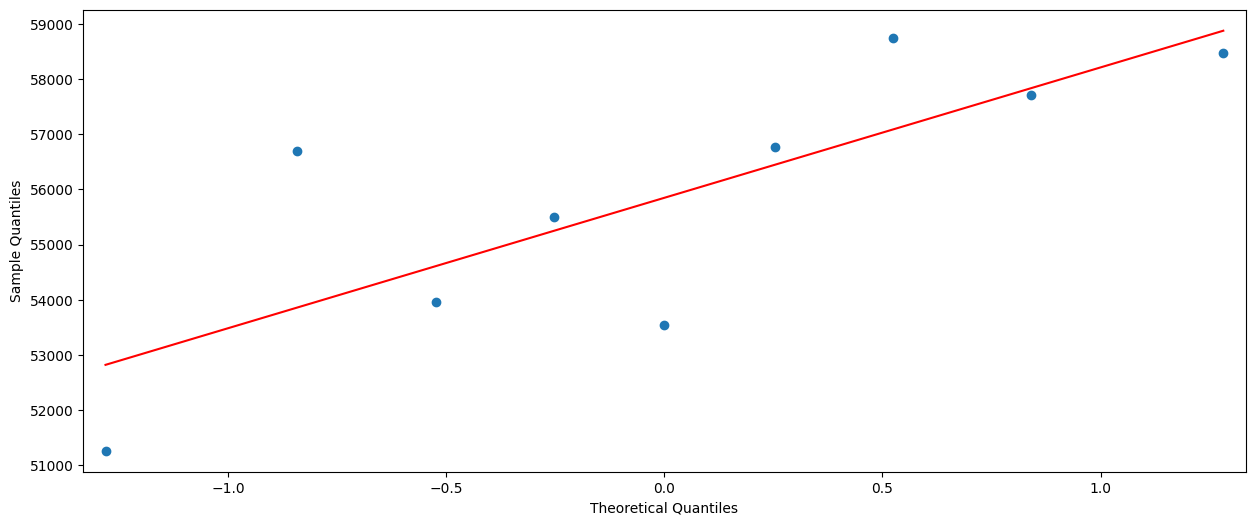

Statistics=0.937, p=0.551
Sales data does seem to be describable as normal distributed (fail to reject H0).


SalesAmount
count      9.000000
mean   55849.111111
std     2505.922956
min    51265.000000
25%    53954.000000
50%    56692.000000
75%    57704.000000
max    58746.000000

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go
plot_data = [
    go.Histogram(
        x=MonthlyDf.loc['2016-05-01':'2017-01-01']
    )
]
plot_layout = go.Layout(
        title='SalesAmount'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

print("Skewness: %f" % MonthlyDf.loc['2016-05-01':'2017-01-01'].skew())
print("Kurtosis: %f" % MonthlyDf.loc['2016-05-01':'2017-01-01'].kurt())

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(MonthlyDf.loc['2016-05-01':'2017-01-01'], line='s')
pyplot.show()

from scipy.stats import shapiro
stat, p = shapiro(MonthlyDf.loc['2016-05-01':'2017-01-01'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sales data does seem to be describable as normal distributed (fail to reject H0).')
else:
    print('Sales data does not seem to be describable as normal distributed (reject H0).')

MonthlyDf.loc['2016-05-01':'2017-01-01'].describe()

# Klassen

Wir verwenden eine **Klasse** namens `SPC` (Statistical Process Control). Eine Klasse kann man sich wie eine Bauanleitung für ein Objekt vorstellen. Man kann sich das wie eine Schablone vorstellen, die festlegt, welche Daten ein Objekt haben kann und welche Aktionen es ausführen kann (Kapselung und Wiederverwendbarkeit).

* **`class SPC:`**: Dies definiert die Schablone. Alles, was darunter eingerückt ist, gehört zur Klasse.
* **Methoden**: Innerhalb der Klasse gibt es zwei spezielle Aktionen, die man **Methoden** nennt: `fit` und `QCC`. Methoden sind wie Funktionen, die aber zu einer Klasse gehören.
* **`self`**: Jede Methode hat `self` als ersten Parameter. `self` bezieht sich immer auf das spezifische Objekt (die "Instanz") der Klasse, das gerade verwendet wird. So kann das Objekt seine eigenen Daten speichern und darauf zugreifen.

### Die `fit`-Methode (Daten vorbereiten)

Die `fit`-Methode ist dafür da, die Daten zu verarbeiten und vorzubereiten. Das Wort "fit" kommt aus dem Englischen und bedeutet "anpassen", hier im Sinne von das Modell an die Daten anpassen.

* **`def fit(self, data):`**: Diese Methode nimmt die Daten, die wir ihr geben, als Parameter `data`.
* **`self.X = data`**: Hier werden die übergebenen Daten in einer sogenannten **Instanzvariable** namens `X` gespeichert. Das `self` davor ist wichtig, weil es sicherstellt, dass diese Variable zu dem `SPC`-Objekt gehört.
* **`self.mR = ...`**: Diese Zeilen berechnen die "gleitende Spannweite" (Moving Range). Es wird eine neue Instanzvariable `mR` erstellt, die die **absoluten Differenzen** zwischen jedem Datenpunkt und dem nächsten speichert. Das ist eine wichtige Voraussetzung für die zweite Regelkarte.


### Die `QCC`-Methode (Grafiken erstellen)

Die `QCC`-Methode (Quality Control Chart) nimmt die vorbereiteten Daten und berechnet die Kontrolllinien und Grenzen, um die Qualitätsregelkarte zu erstellen.

* **`def QCC(self):`**: Diese Methode braucht keine zusätzlichen Daten, weil sie auf die Daten zugreift, die in der `fit`-Methode gespeichert wurden (`self.X` und `self.mR`).
* **Berechnung der Grenzen**: Innerhalb der Methode werden die Werte für die obere, mittlere und untere Kontrollgrenze (`ucl`, `cl`, `lcl`) berechnet.
* **Erstellung der Plots**: Anschließend verwendet der Code die `matplotlib`-Bibliothek, um zwei separate Grafiken zu erstellen: eine für die X-Regelkarte und eine für die mR-Regelkarte. Die berechneten Grenzen werden als horizontale Linien in die Diagramme eingezeichnet.



### Die Verwendung der Klasse

Der letzte Teil des Codes zeigt, wie man die Klasse benutzt:

1.  **`chart = SPC()`**: Hier wird ein **Objekt** (`chart`) aus der Schablone (`SPC`) erstellt. Jetzt hat `chart` alle Methoden und Variablen, die in der Klasse definiert wurden.
2.  **`chart.fit(...)`**: Mit diesem Aufruf wird die `fit`-Methode des Objekts `chart` ausgeführt, und die Daten werden an es übergeben.
3.  **`chart.QCC()`**: Schließlich wird die `QCC`-Methode des Objekts aufgerufen, um die Berechnungen durchzuführen und die Grafiken zu zeichnen.

Zusammenfassend lässt sich sagen, dass die Klasse `SPC` die gesamte Logik für die Erstellung der Qualitätsregelkarte an einem Ort bündelt, was den Code sehr organisiert und wiederverwendbar macht. Wir können daher später ein anderes Daten-Set anlegen und einfach wieder `chart.fit(neue_daten)` und `chart.QCC()` aufrufen, um die Charts dafür zu erstellen.

In [ ]:
class SPC:
    def fit(self,data):
        self.X = data
        #print(self.X)
        self.number_of_sample = len(self.X)
        #print(self.number_of_sample)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        #print("selfmr" +str(self.mR))
        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])
            #print("i content"+str(i))
            #print(self.mR[i])
    def QCC(self):
        ucl_X   = self.X.mean() + (3*self.X.std())
        cl_X    = self.X.mean()
        lcl_X   = self.X.mean() - (3*self.X.std())

        ucl_mR   = 3.267*self.mR.mean()
        cl_mR    = self.mR.mean()
        lcl_mR = 1-3*0.853/1.128 if 1-3*0.853/1.128 > 0 else 0

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={:,.0f}".format(ucl_X))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={:,.0f}".format(cl_X))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={:,.0f}".format(lcl_X))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR ,marker="o",color="k", linestyle='--')
        plt.plot([ucl_mR ]*len(self.X),color="r",label="UCL={:,.0f}".format(ucl_mR))
        plt.plot([cl_mR ]*len(self.X),color="b",label="CL={:,.0f}".format(cl_mR))
        plt.plot([lcl_mR ]*len(self.X),color="r",label="LCL={:,.0f}".format(round(lcl_mR,0)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()


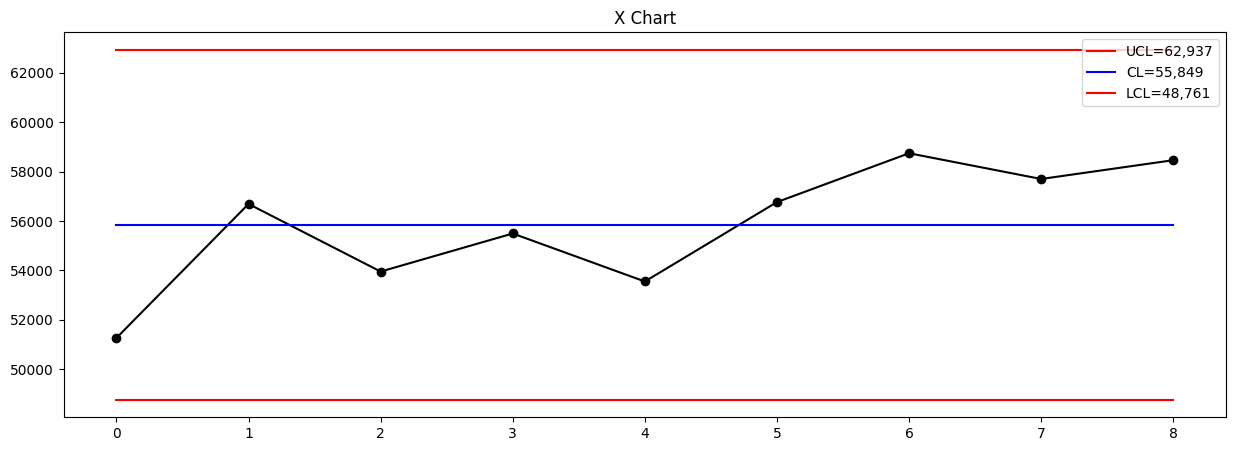

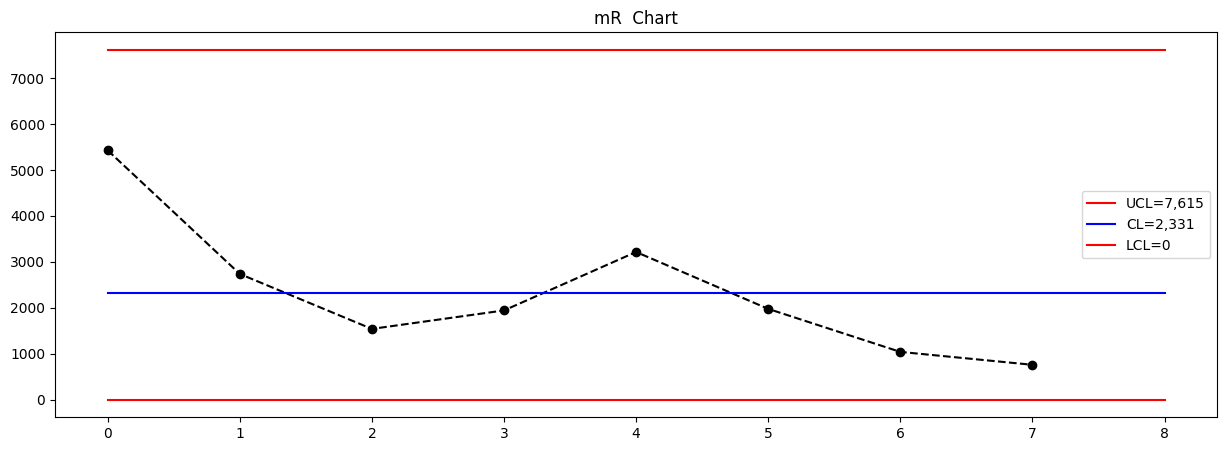

In [ ]:
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
chart = SPC()
chart.fit(FilteredDate1['SalesAmount'].to_numpy())
chart.QCC()

# Aufgabe: Lassen Sie sich die anderen Zeitreihen in der QCC anzeigen

In [ ]:
# Geben Sie hier Ihren Code ein...















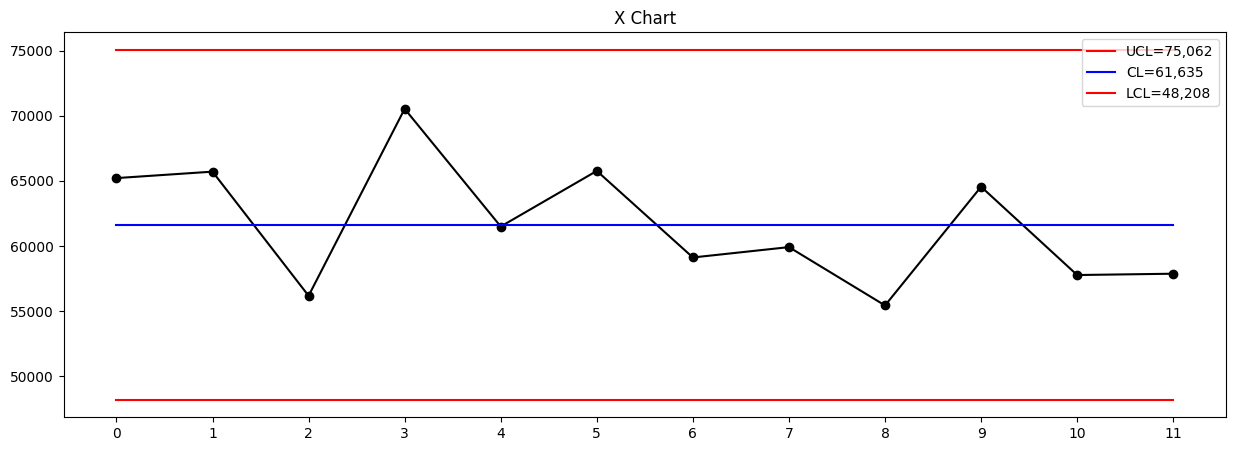

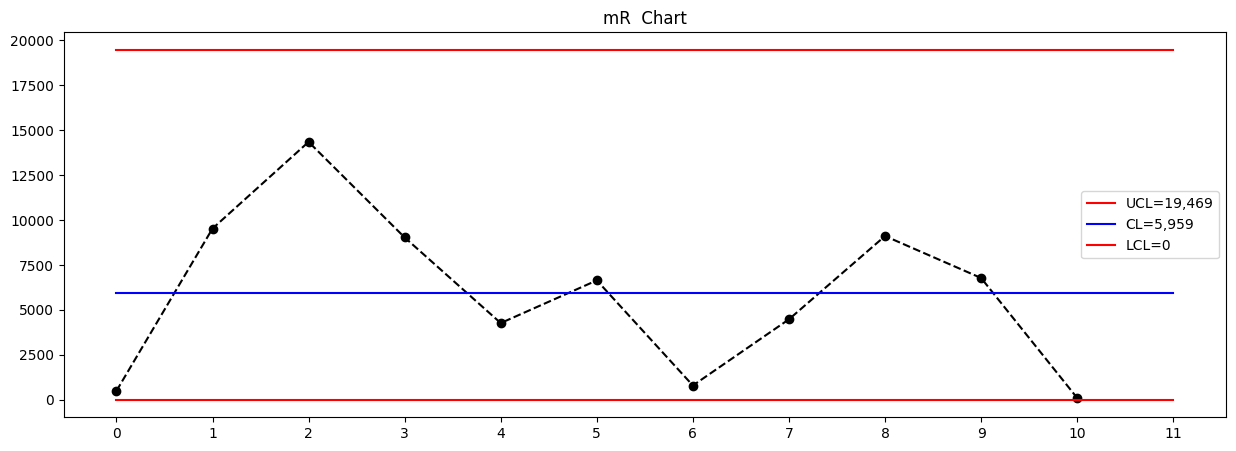

In [ ]:
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
selection =FilteredDate2
chart = SPC()
chart.fit(selection['SalesAmount'].to_numpy())
chart.QCC()